In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
os.environ["OMP_NUM_THREADS"] = "8"

In [2]:
f = open('/Users/sam/Downloads/contaminantes_2013.json')

d_2013 = json.load(f)
f.close()

In [3]:
polution = d_2013['pollutionMeasurements']['date']

In [4]:
counts = {}
new = {}

for date, hours in polution.items():
    for contaminant, zones in hours.items():
        if contaminant not in counts:
            counts[contaminant] = {}
        if contaminant not in new:
            new[contaminant] = {}
        for zone, value in zones.items():
            if zone not in counts[contaminant]:
                counts[contaminant][zone] = 0
            if zone not in new[contaminant]:
                new[contaminant][zone] = []
            
            if len(value) != 0:
                counts[contaminant][zone] +=1
            new[contaminant][zone].append(value)
            

In [5]:
counts_df = pd.DataFrame(counts)
counts_df['Total'] = counts_df.sum(axis=1)


In [6]:
def color_by_column(value, column):
    if column == 'Total':
        
        if value > 8000*9:
            color = 'lime'
        elif value > 7500*9:
            color = 'green'
        elif value > 6000*9:
            color = 'orange'
        else:
            color = 'red'
        
       
    else:
        if value > 8000:
            color = 'lime'
        elif value > 7500:
            color = 'green'
        elif value > 6000:
            color = 'orange'
        else:
            color = 'red'
        
            
    return 'background-color: %s' % color

In [7]:
counts_df = counts_df.style.apply(lambda x: [color_by_column(v, x.name) for v in x])

In [8]:
counts_df

In [9]:
data = []

for contaminant, zones in new.items():
    for zone, values in zones.items():
        for idx, value in enumerate(values):
           
            data.append({'zone': zone, 'contaminant': contaminant, 'value': value, 'idx': idx})


df = pd.DataFrame(data)

new_df = df.pivot(index=['zone', 'idx'], columns='contaminant', values='value')


new_df = new_df.reset_index()
new_df = new_df.drop(columns=['idx'])
new_df['dates'] = list(polution.keys())*28

In [10]:
for element in new_df:
    if element != 'zone' and element != 'dates':
        new_df[element] = pd.to_numeric(new_df[element], errors='coerce')

new_df['dates'] = new_df['dates'].str.replace(' 24:00', ' 00:00')
new_df['dates'] = pd.to_datetime(new_df['dates'])
new_df.set_index('dates', inplace=True)


In [11]:

new_df

contaminant         zone   CO    NO   NO2    NOX   O3   PM10  PM2.5  PMCO  \
dates                                                                       
2013-01-01 01:00:00  ACO  1.5  23.0  30.0   54.0  2.0  127.0    NaN   NaN   
2013-01-01 02:00:00  ACO  1.8  36.0  30.0   66.0  2.0  182.0    NaN   NaN   
2013-01-01 03:00:00  ACO  2.4  58.0  27.0   84.0  3.0  224.0    NaN   NaN   
2013-01-01 04:00:00  ACO  1.8  31.0  23.0   54.0  2.0  225.0    NaN   NaN   
2013-01-01 05:00:00  ACO  1.6  18.0  22.0   41.0  2.0  167.0    NaN   NaN   
...                  ...  ...   ...   ...    ...  ...    ...    ...   ...   
2013-12-31 20:00:00  XAL  1.2  31.0  40.0   71.0  9.0   63.0   24.0  39.0   
2013-12-31 21:00:00  XAL  1.3  40.0  39.0   79.0  4.0   55.0   24.0  31.0   
2013-12-31 22:00:00  XAL  1.8  73.0  36.0  110.0  2.0   78.0   43.0  35.0   
2013-12-31 23:00:00  XAL  1.6  83.0  32.0  115.0  2.0   65.0   39.0  26.0   
2013-12-31 00:00:00  XAL  1.4  56.0  32.0   88.0  2.0   70.0   47.0  23.0   

contaminant           SO2  
dates                      
2013-01-01 01:00:00   6.0  
2013-01-01 02:00:00   9.0  
2013-01-01 03:00:00   8.0  
2013-01-01 04:00:00   6.0  
2013-01-01 05:00:00   7.0  
...                   ...  
2013-12-31 20:00:00   3.0  
2013-12-31 21:00:00   3.0  
2013-12-31 22:00:00   6.0  
2013-12-31 23:00:00  17.0  
2013-12-31 00:00:00  28.0  

[245280 rows x 10 columns]

In [12]:
zones = []
allzones = list(new['CO'].keys())
valores = counts_df.data['Total']
for i in range(len(valores)):
   
    if (valores[i] > 8000*9).any():
        zones.append(allzones[i])
        
zones
    

['MER', 'PED', 'SFE', 'TLA', 'UIZ']

In [13]:
best = new_df.loc[new_df['zone'].isin(zones)].copy()
best

contaminant         zone   CO    NO   NO2   NOX    O3   PM10  PM2.5  PMCO  \
dates                                                                       
2013-01-01 01:00:00  MER  NaN   NaN   NaN   NaN   NaN   62.0   38.0  24.0   
2013-01-01 02:00:00  MER  NaN   NaN   NaN   NaN   NaN   98.0   67.0  31.0   
2013-01-01 03:00:00  MER  NaN   NaN   NaN   NaN   NaN  110.0   75.0  35.0   
2013-01-01 04:00:00  MER  NaN   NaN   NaN   NaN   NaN  141.0  100.0  41.0   
2013-01-01 05:00:00  MER  NaN   NaN   NaN   NaN   NaN  117.0   84.0  34.0   
...                  ...  ...   ...   ...   ...   ...    ...    ...   ...   
2013-12-31 20:00:00  UIZ  0.9   3.0  36.0  39.0  30.0   36.0   21.0  15.0   
2013-12-31 21:00:00  UIZ  1.0  20.0  44.0  64.0  12.0   43.0   23.0  20.0   
2013-12-31 22:00:00  UIZ  0.8  32.0  37.0  69.0   3.0   42.0   21.0  21.0   
2013-12-31 23:00:00  UIZ  0.9  47.0  34.0  81.0   3.0   54.0   34.0  20.0   
2013-12-31 00:00:00  UIZ  0.9  41.0  31.0  72.0   3.0   89.0   66.0  23.0   

contaminant           SO2  
dates                      
2013-01-01 01:00:00   NaN  
2013-01-01 02:00:00   NaN  
2013-01-01 03:00:00   NaN  
2013-01-01 04:00:00   NaN  
2013-01-01 05:00:00   NaN  
...                   ...  
2013-12-31 20:00:00   3.0  
2013-12-31 21:00:00  15.0  
2013-12-31 22:00:00  35.0  
2013-12-31 23:00:00  37.0  
2013-12-31 00:00:00  25.0  

[43800 rows x 10 columns]

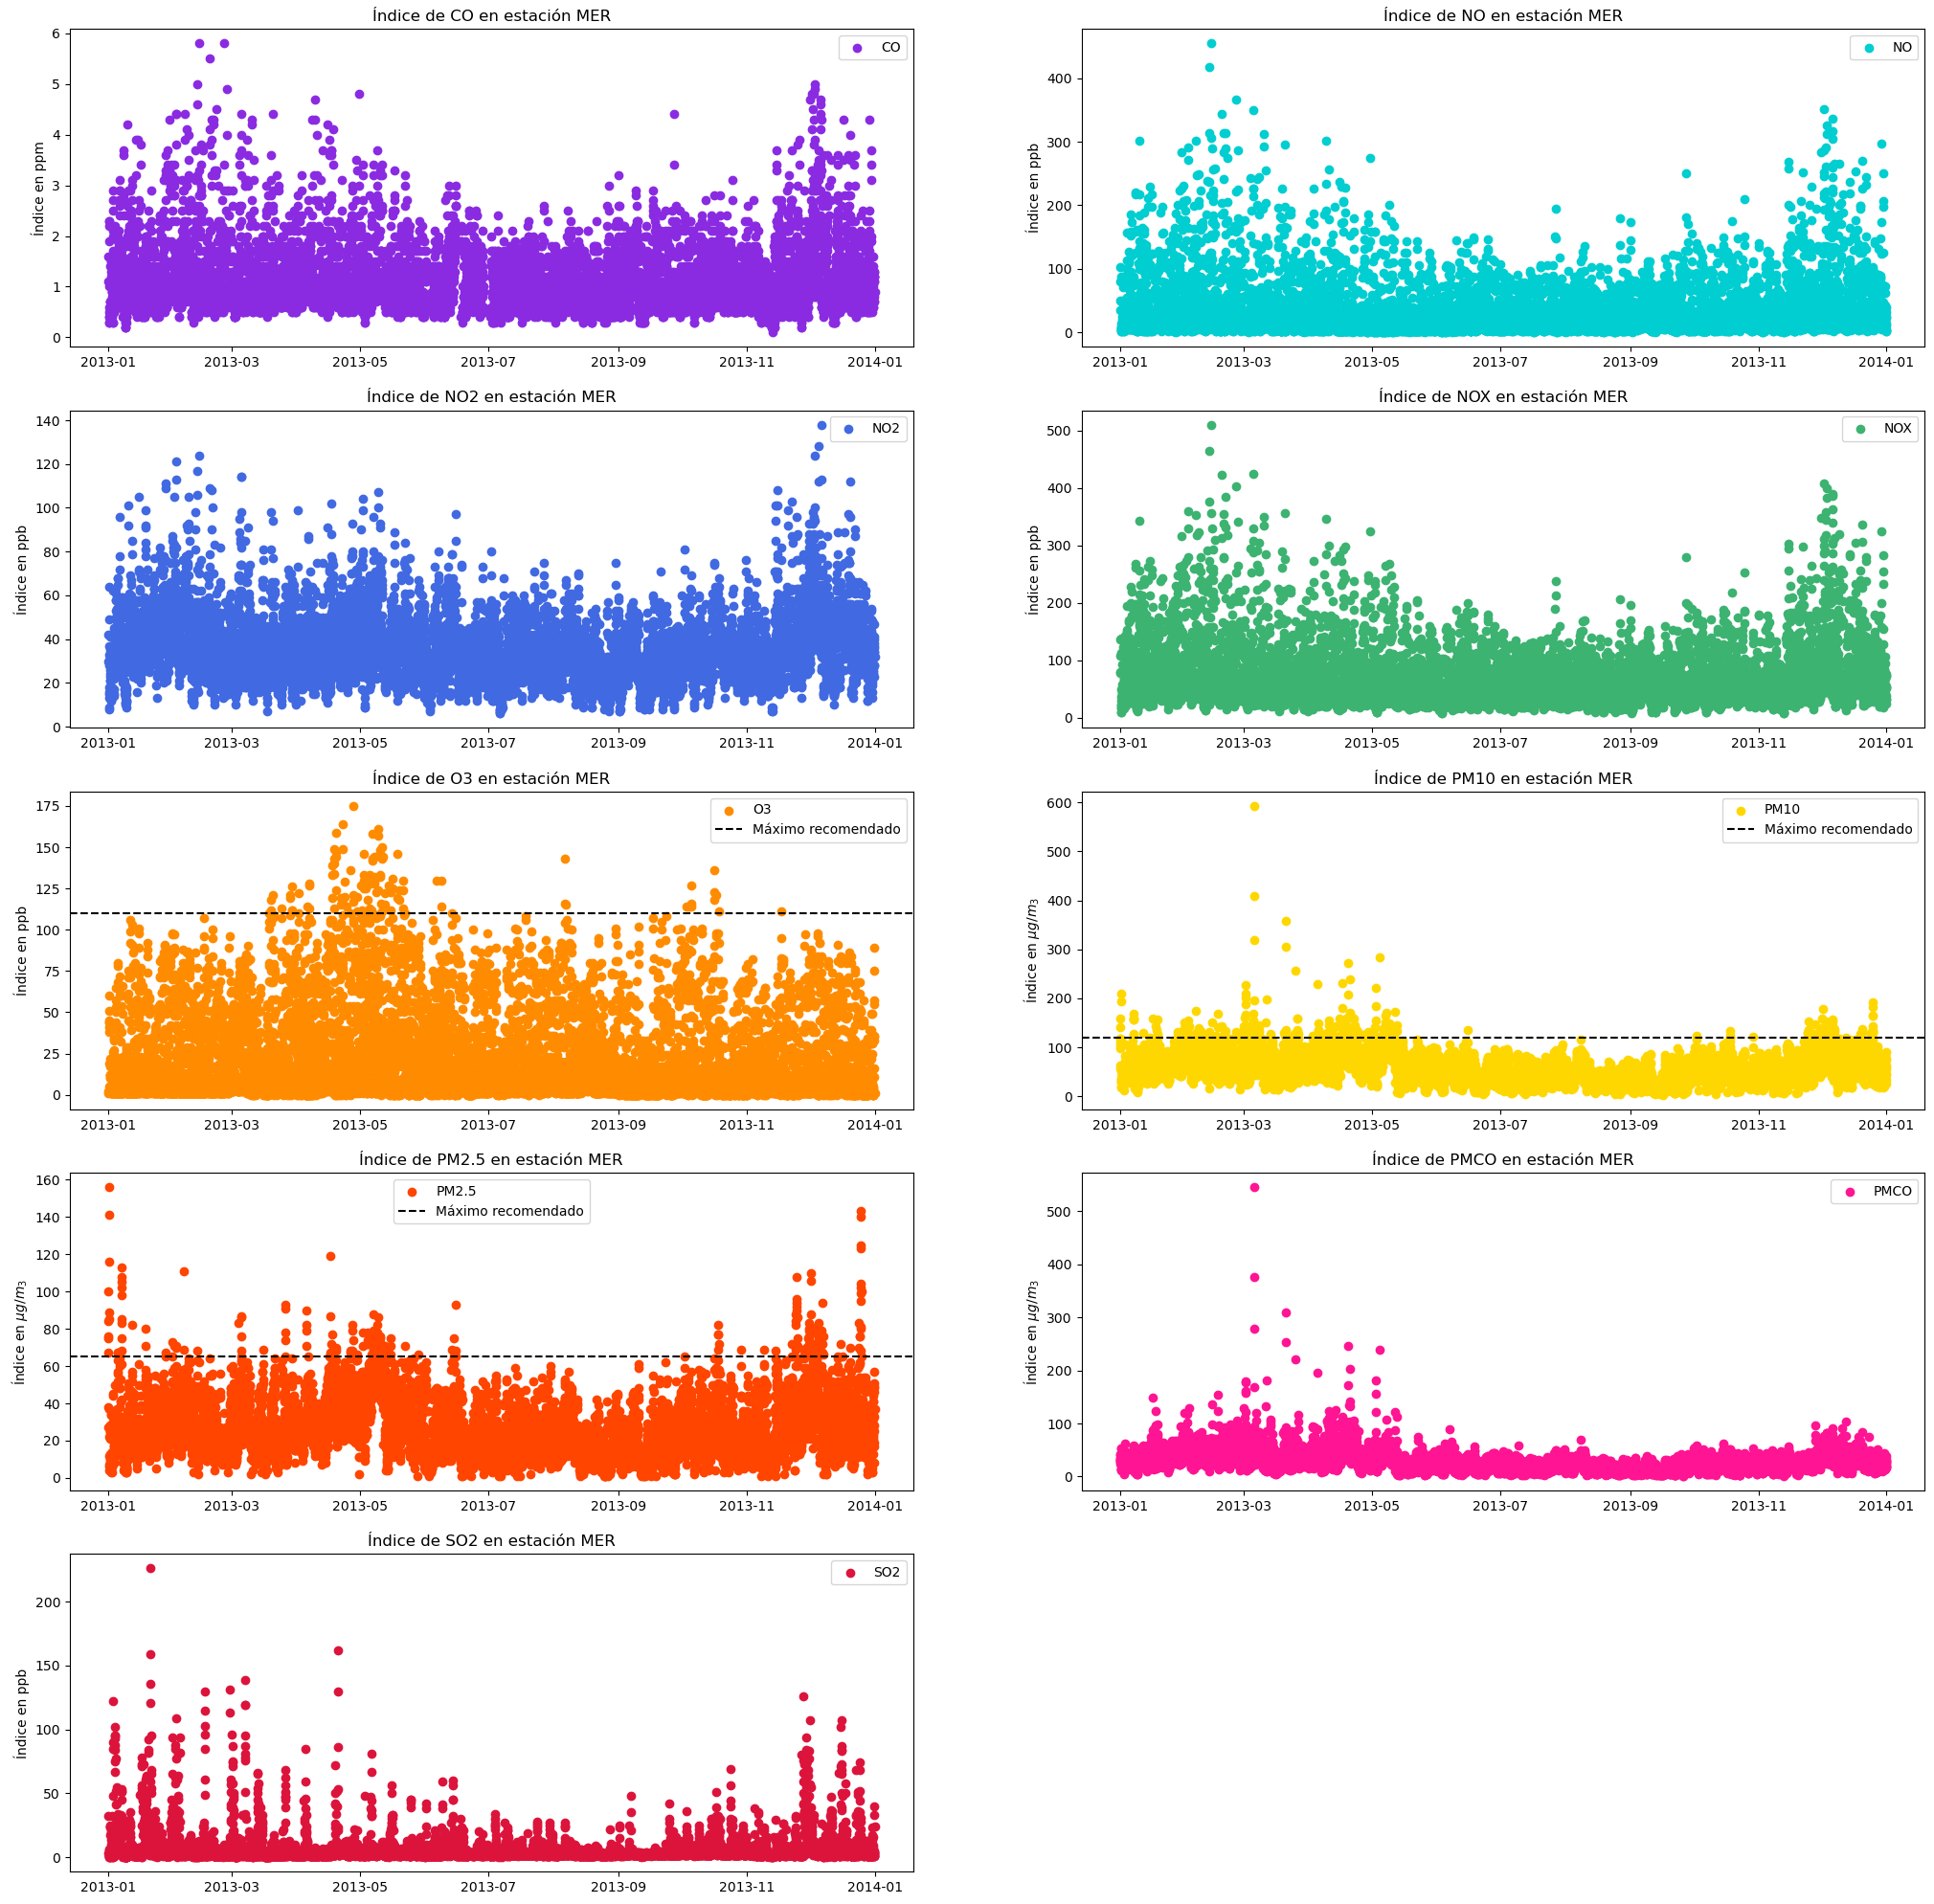

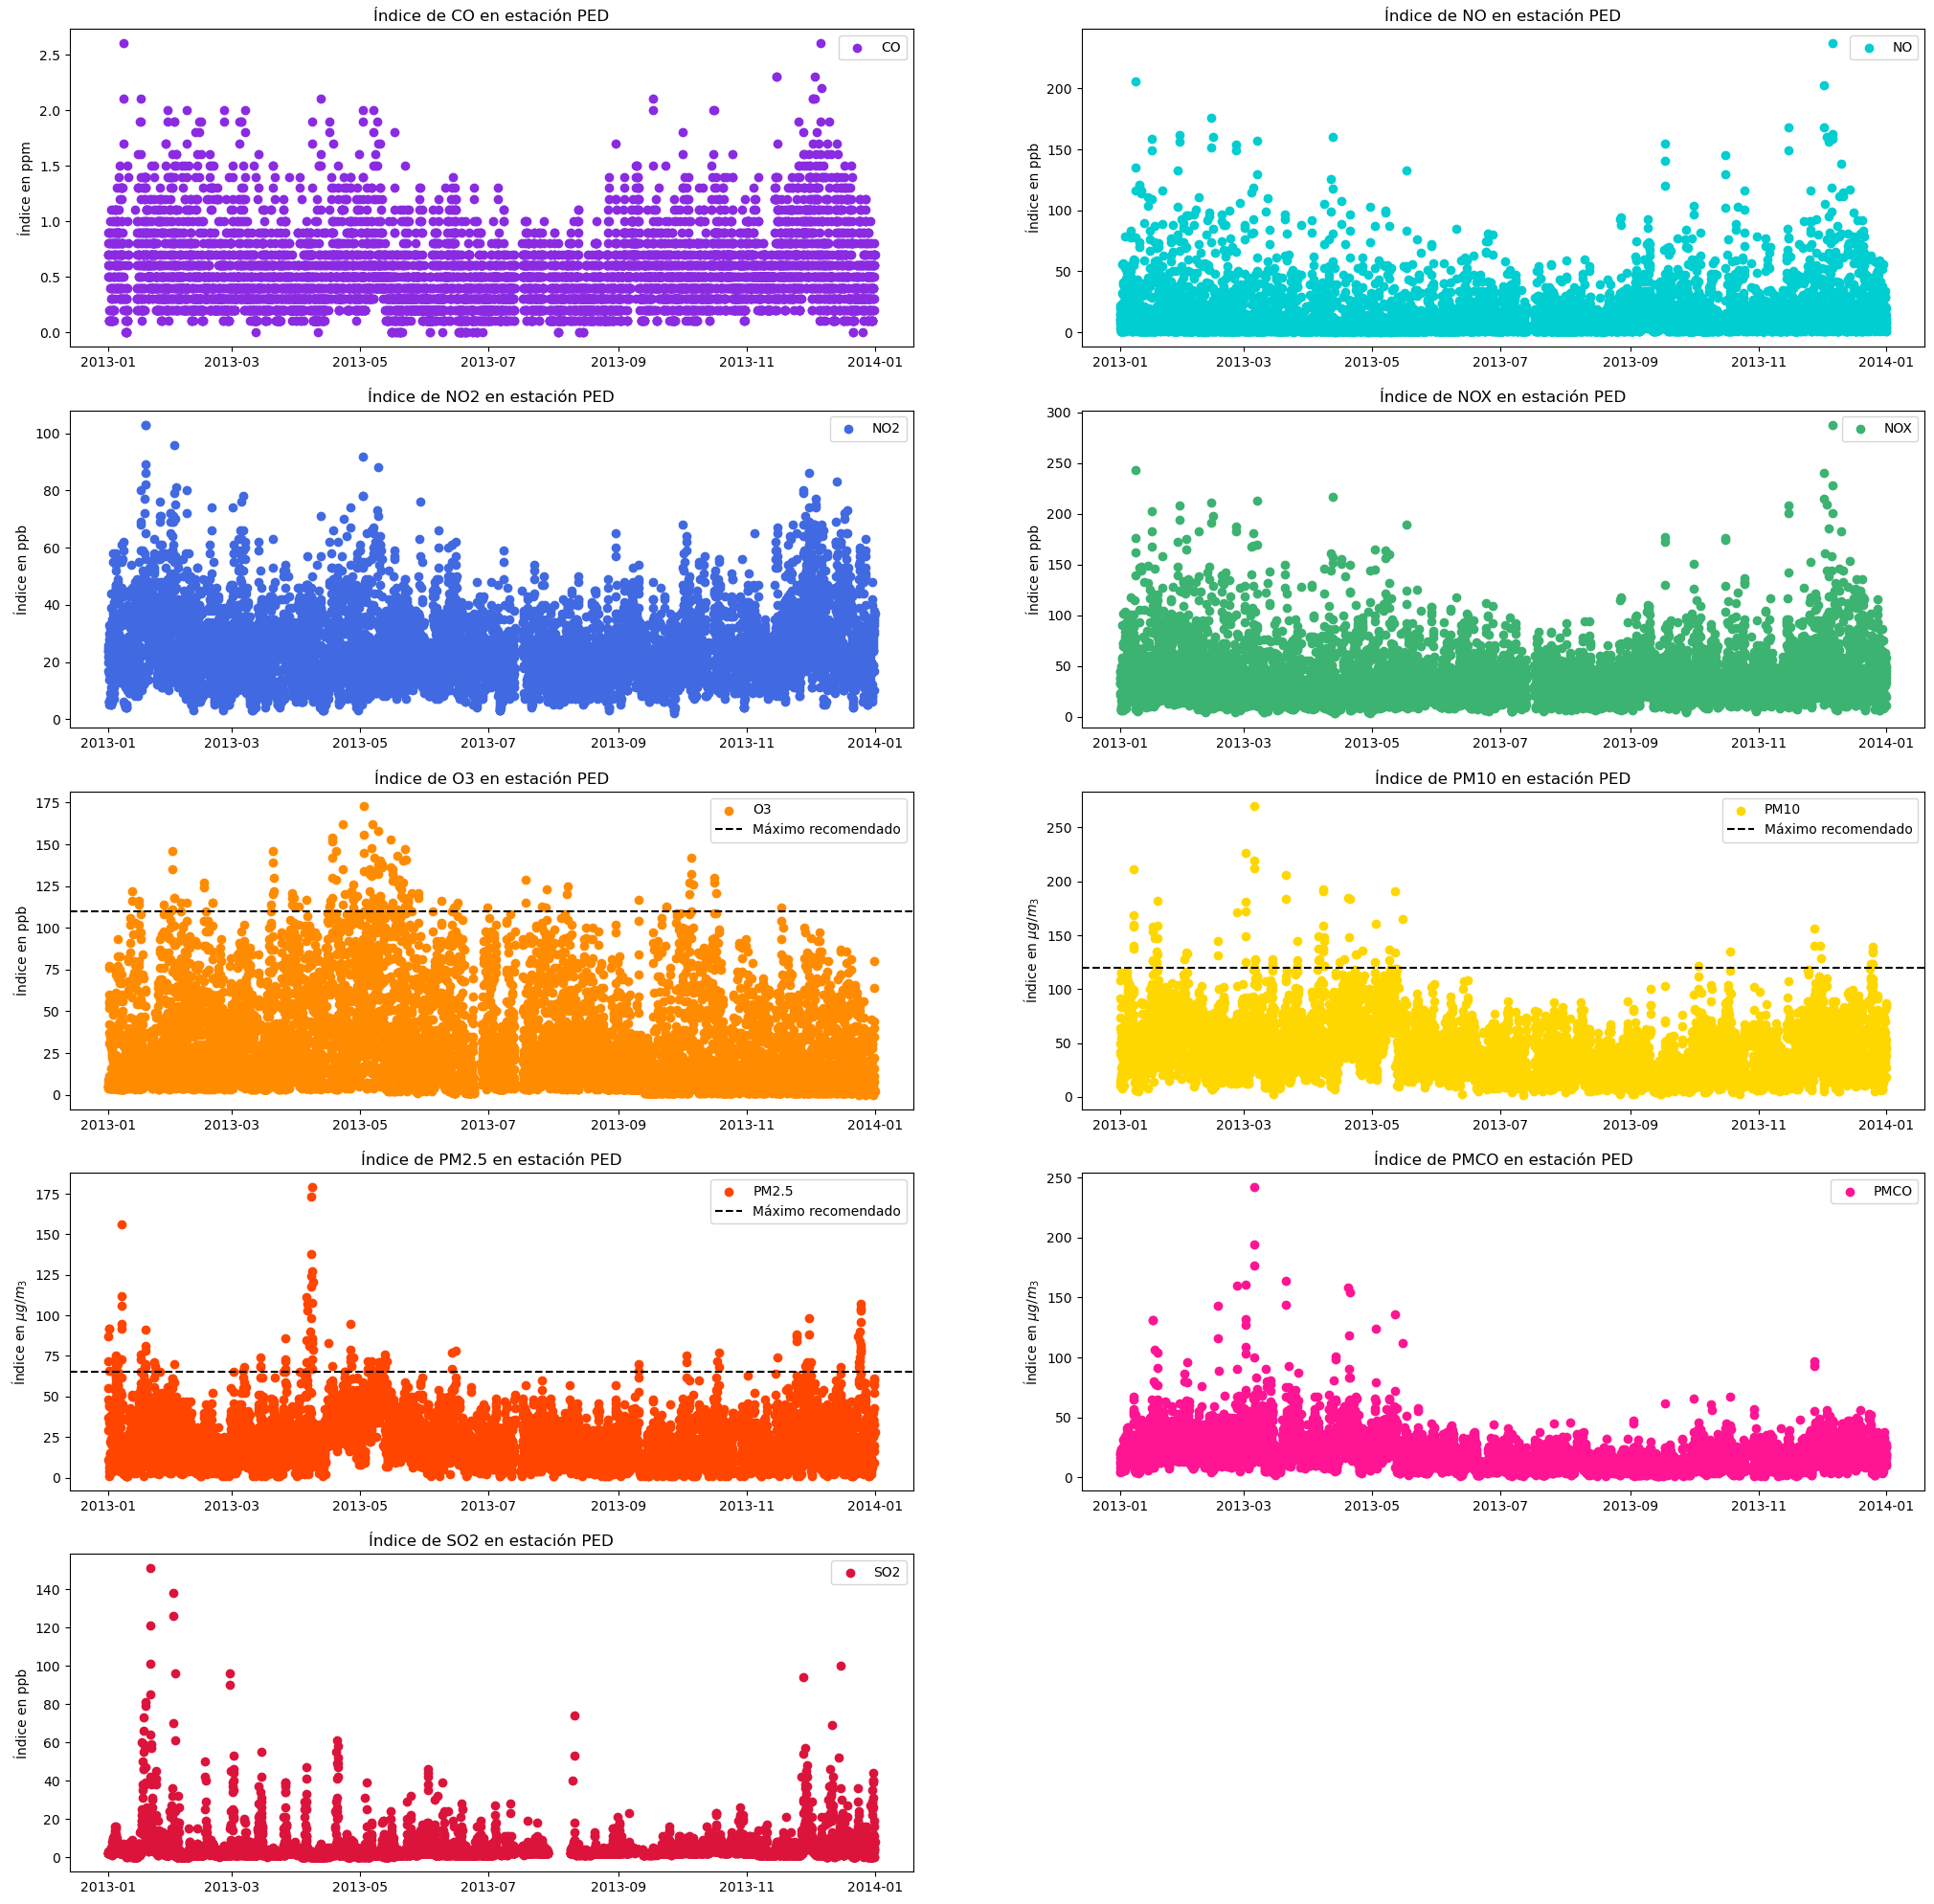

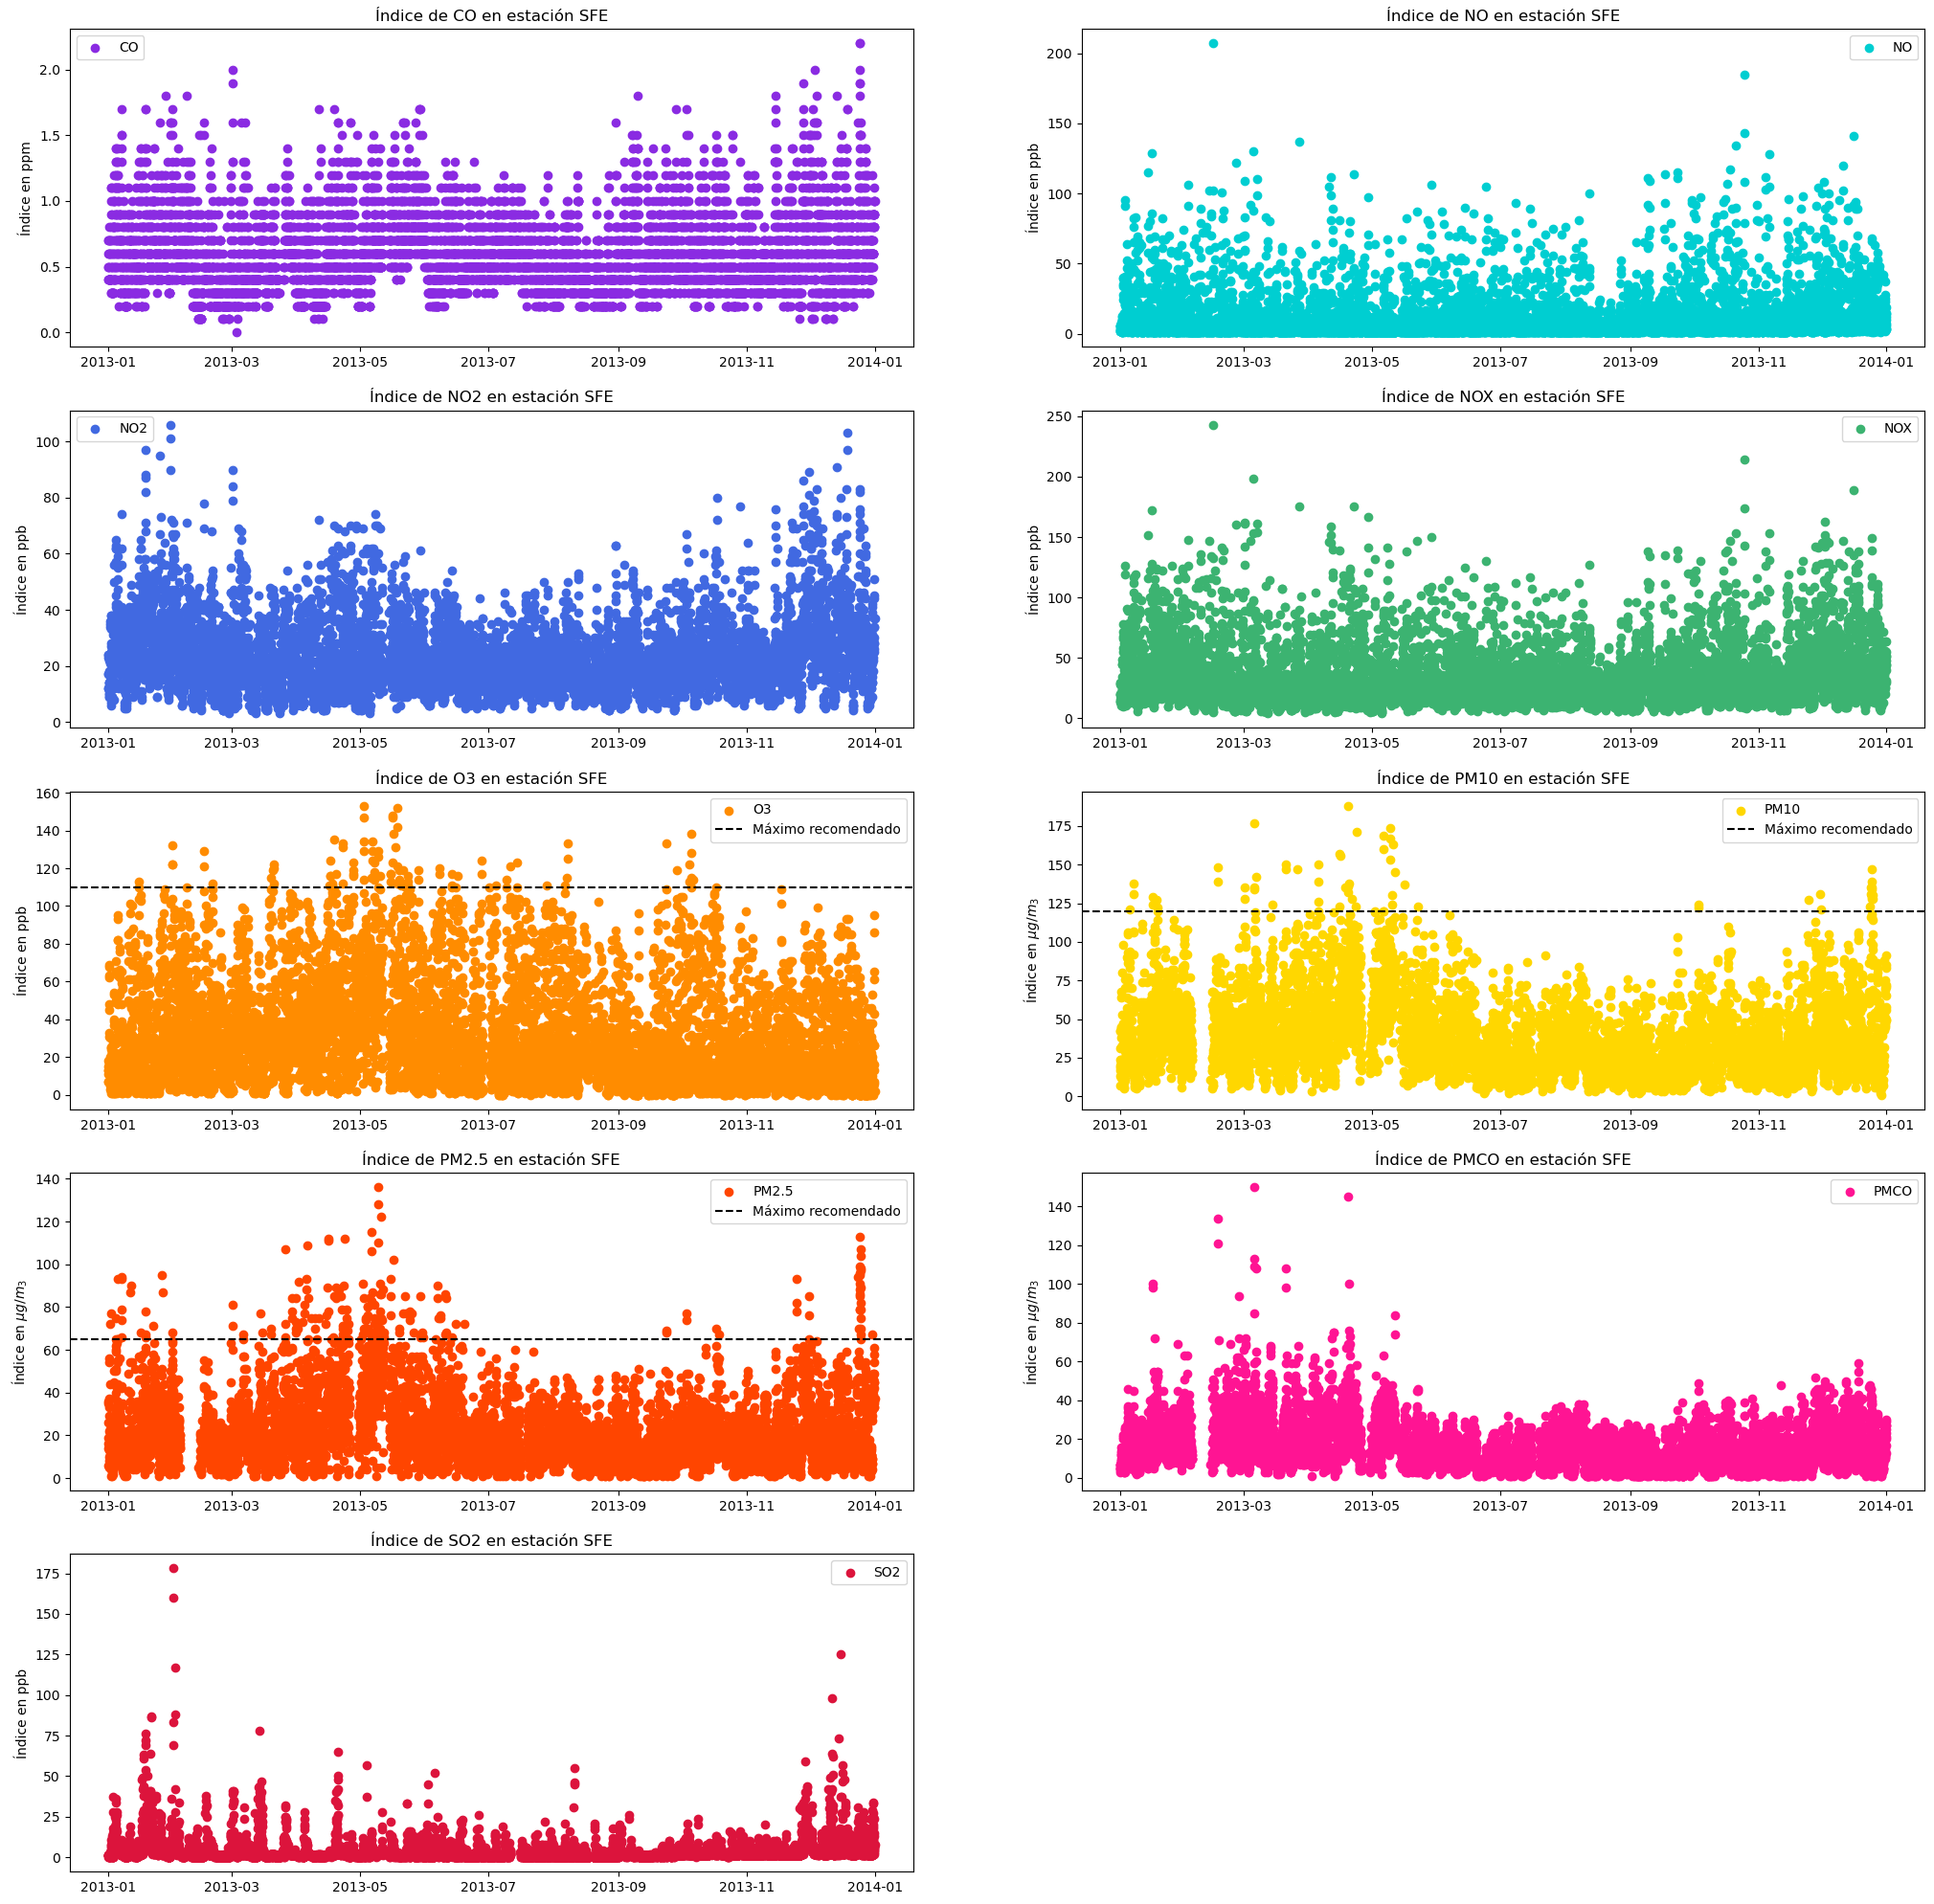

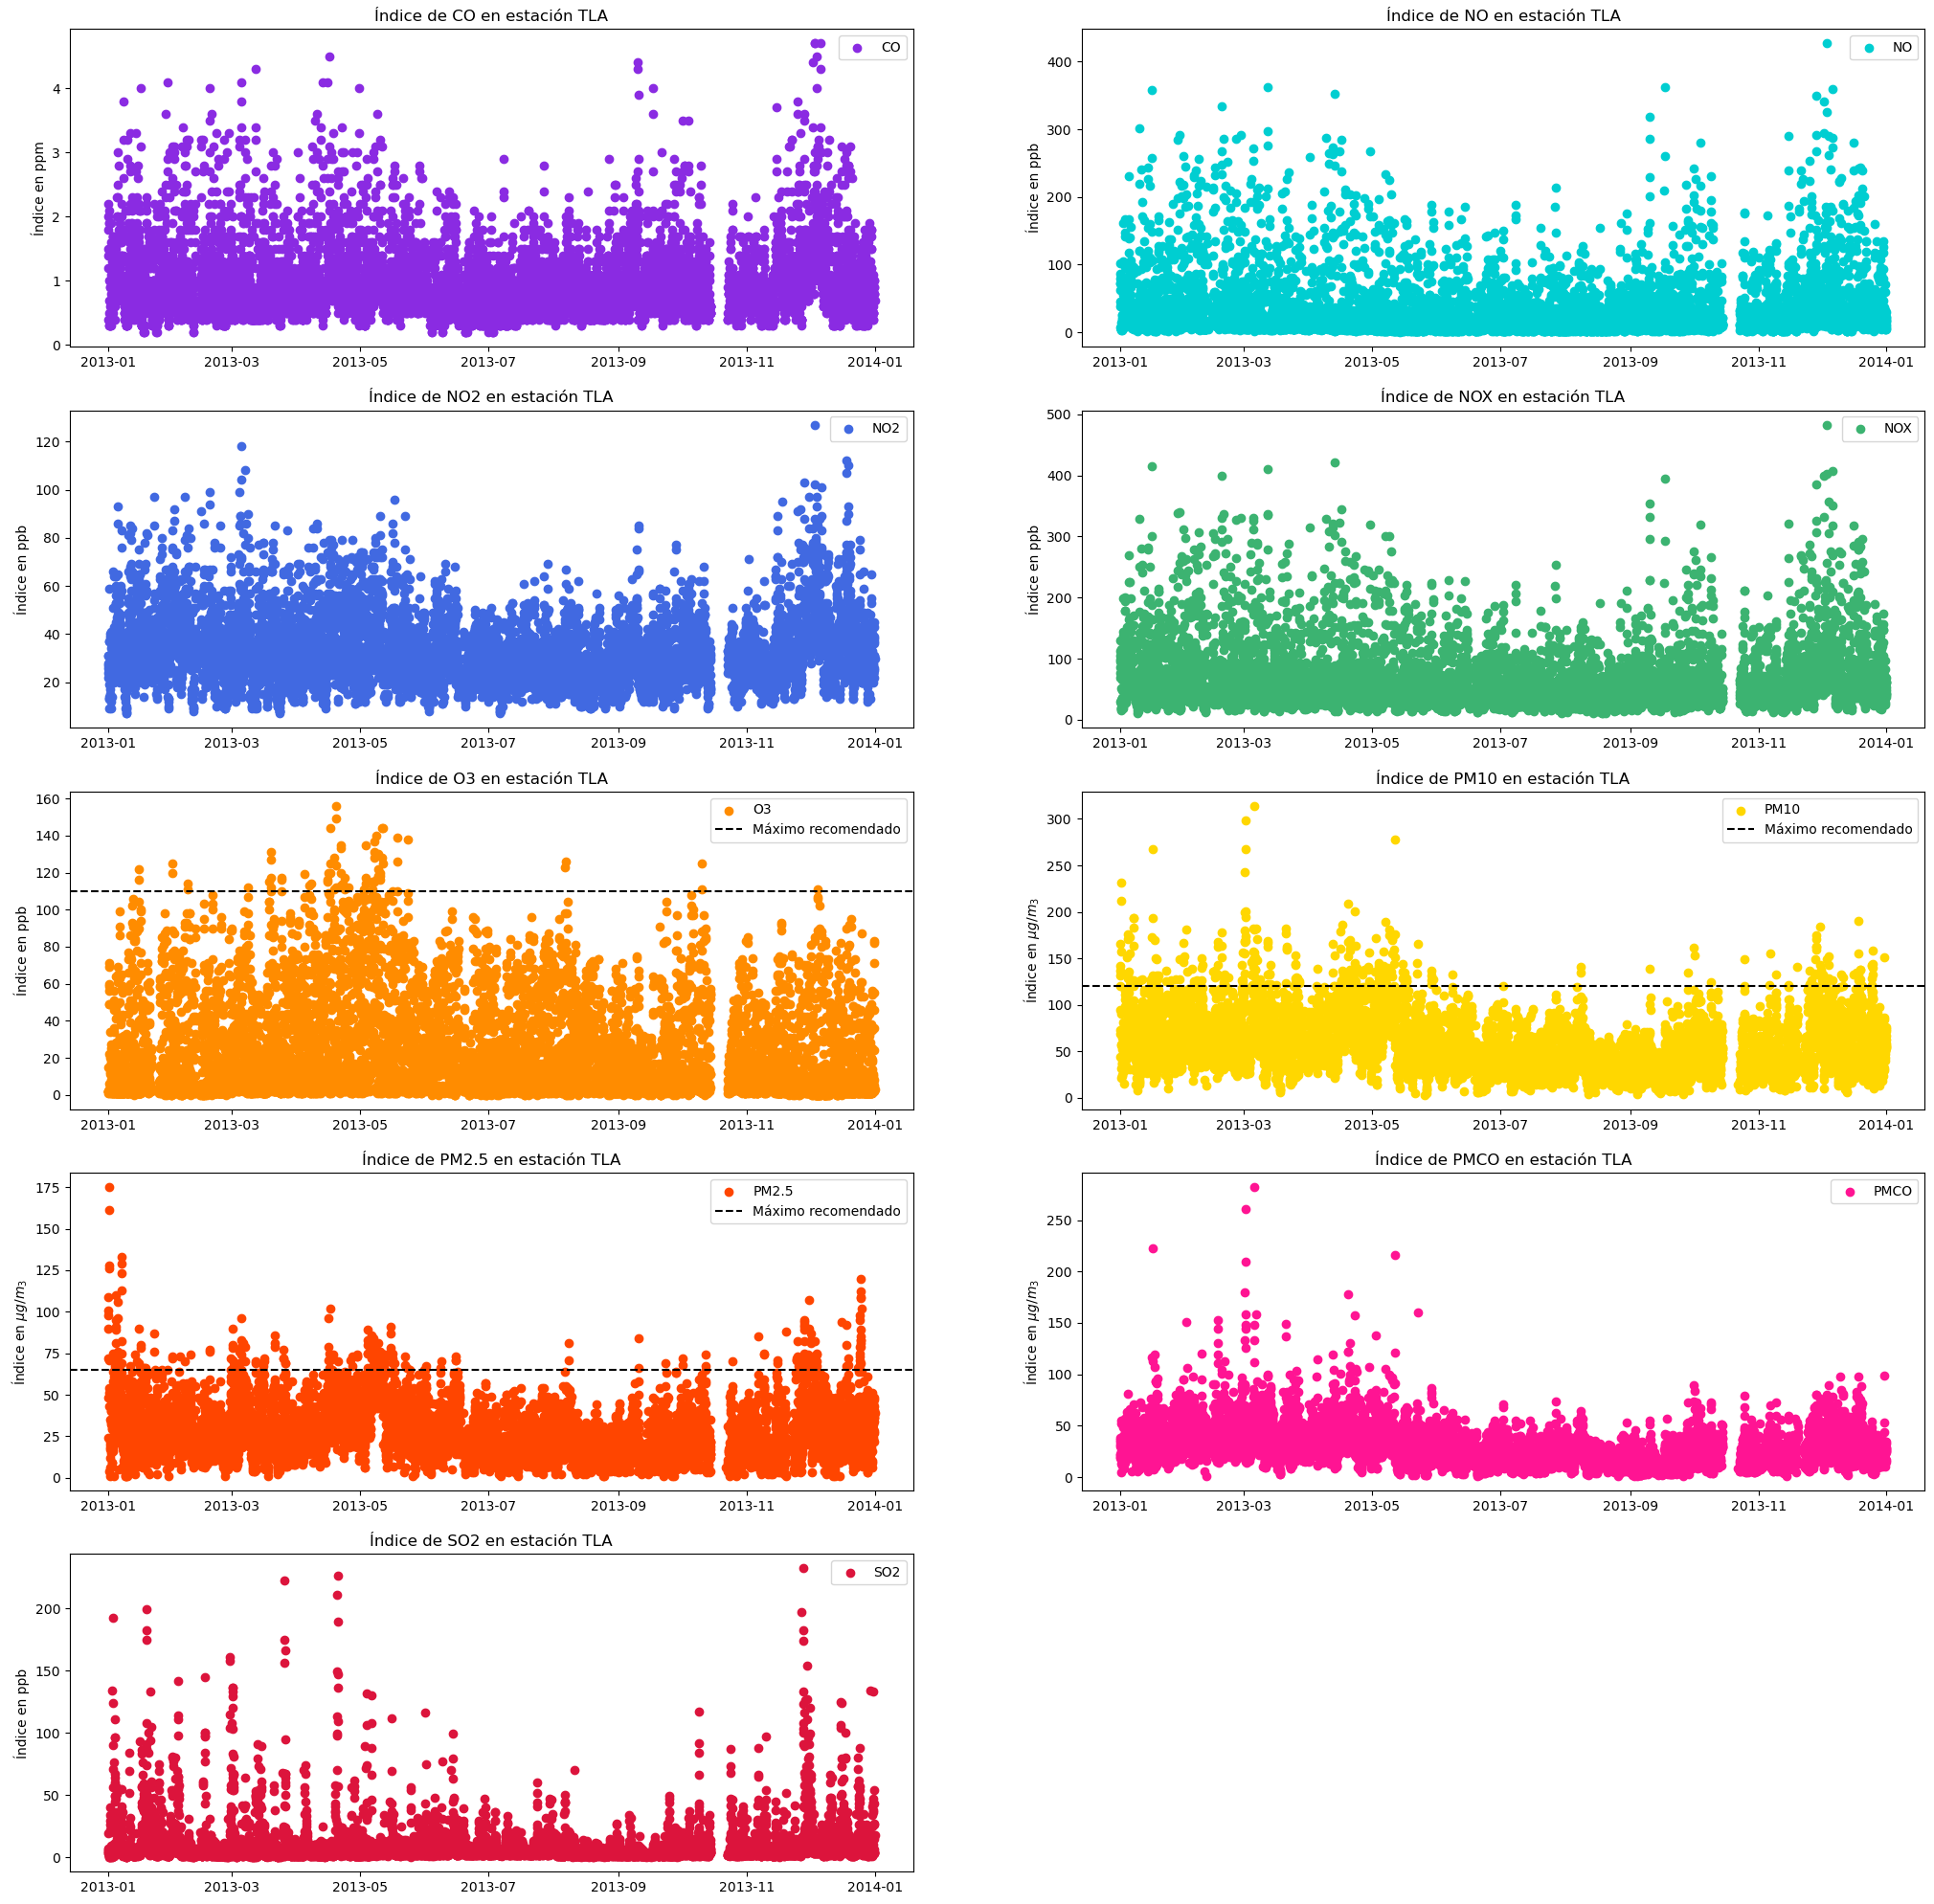

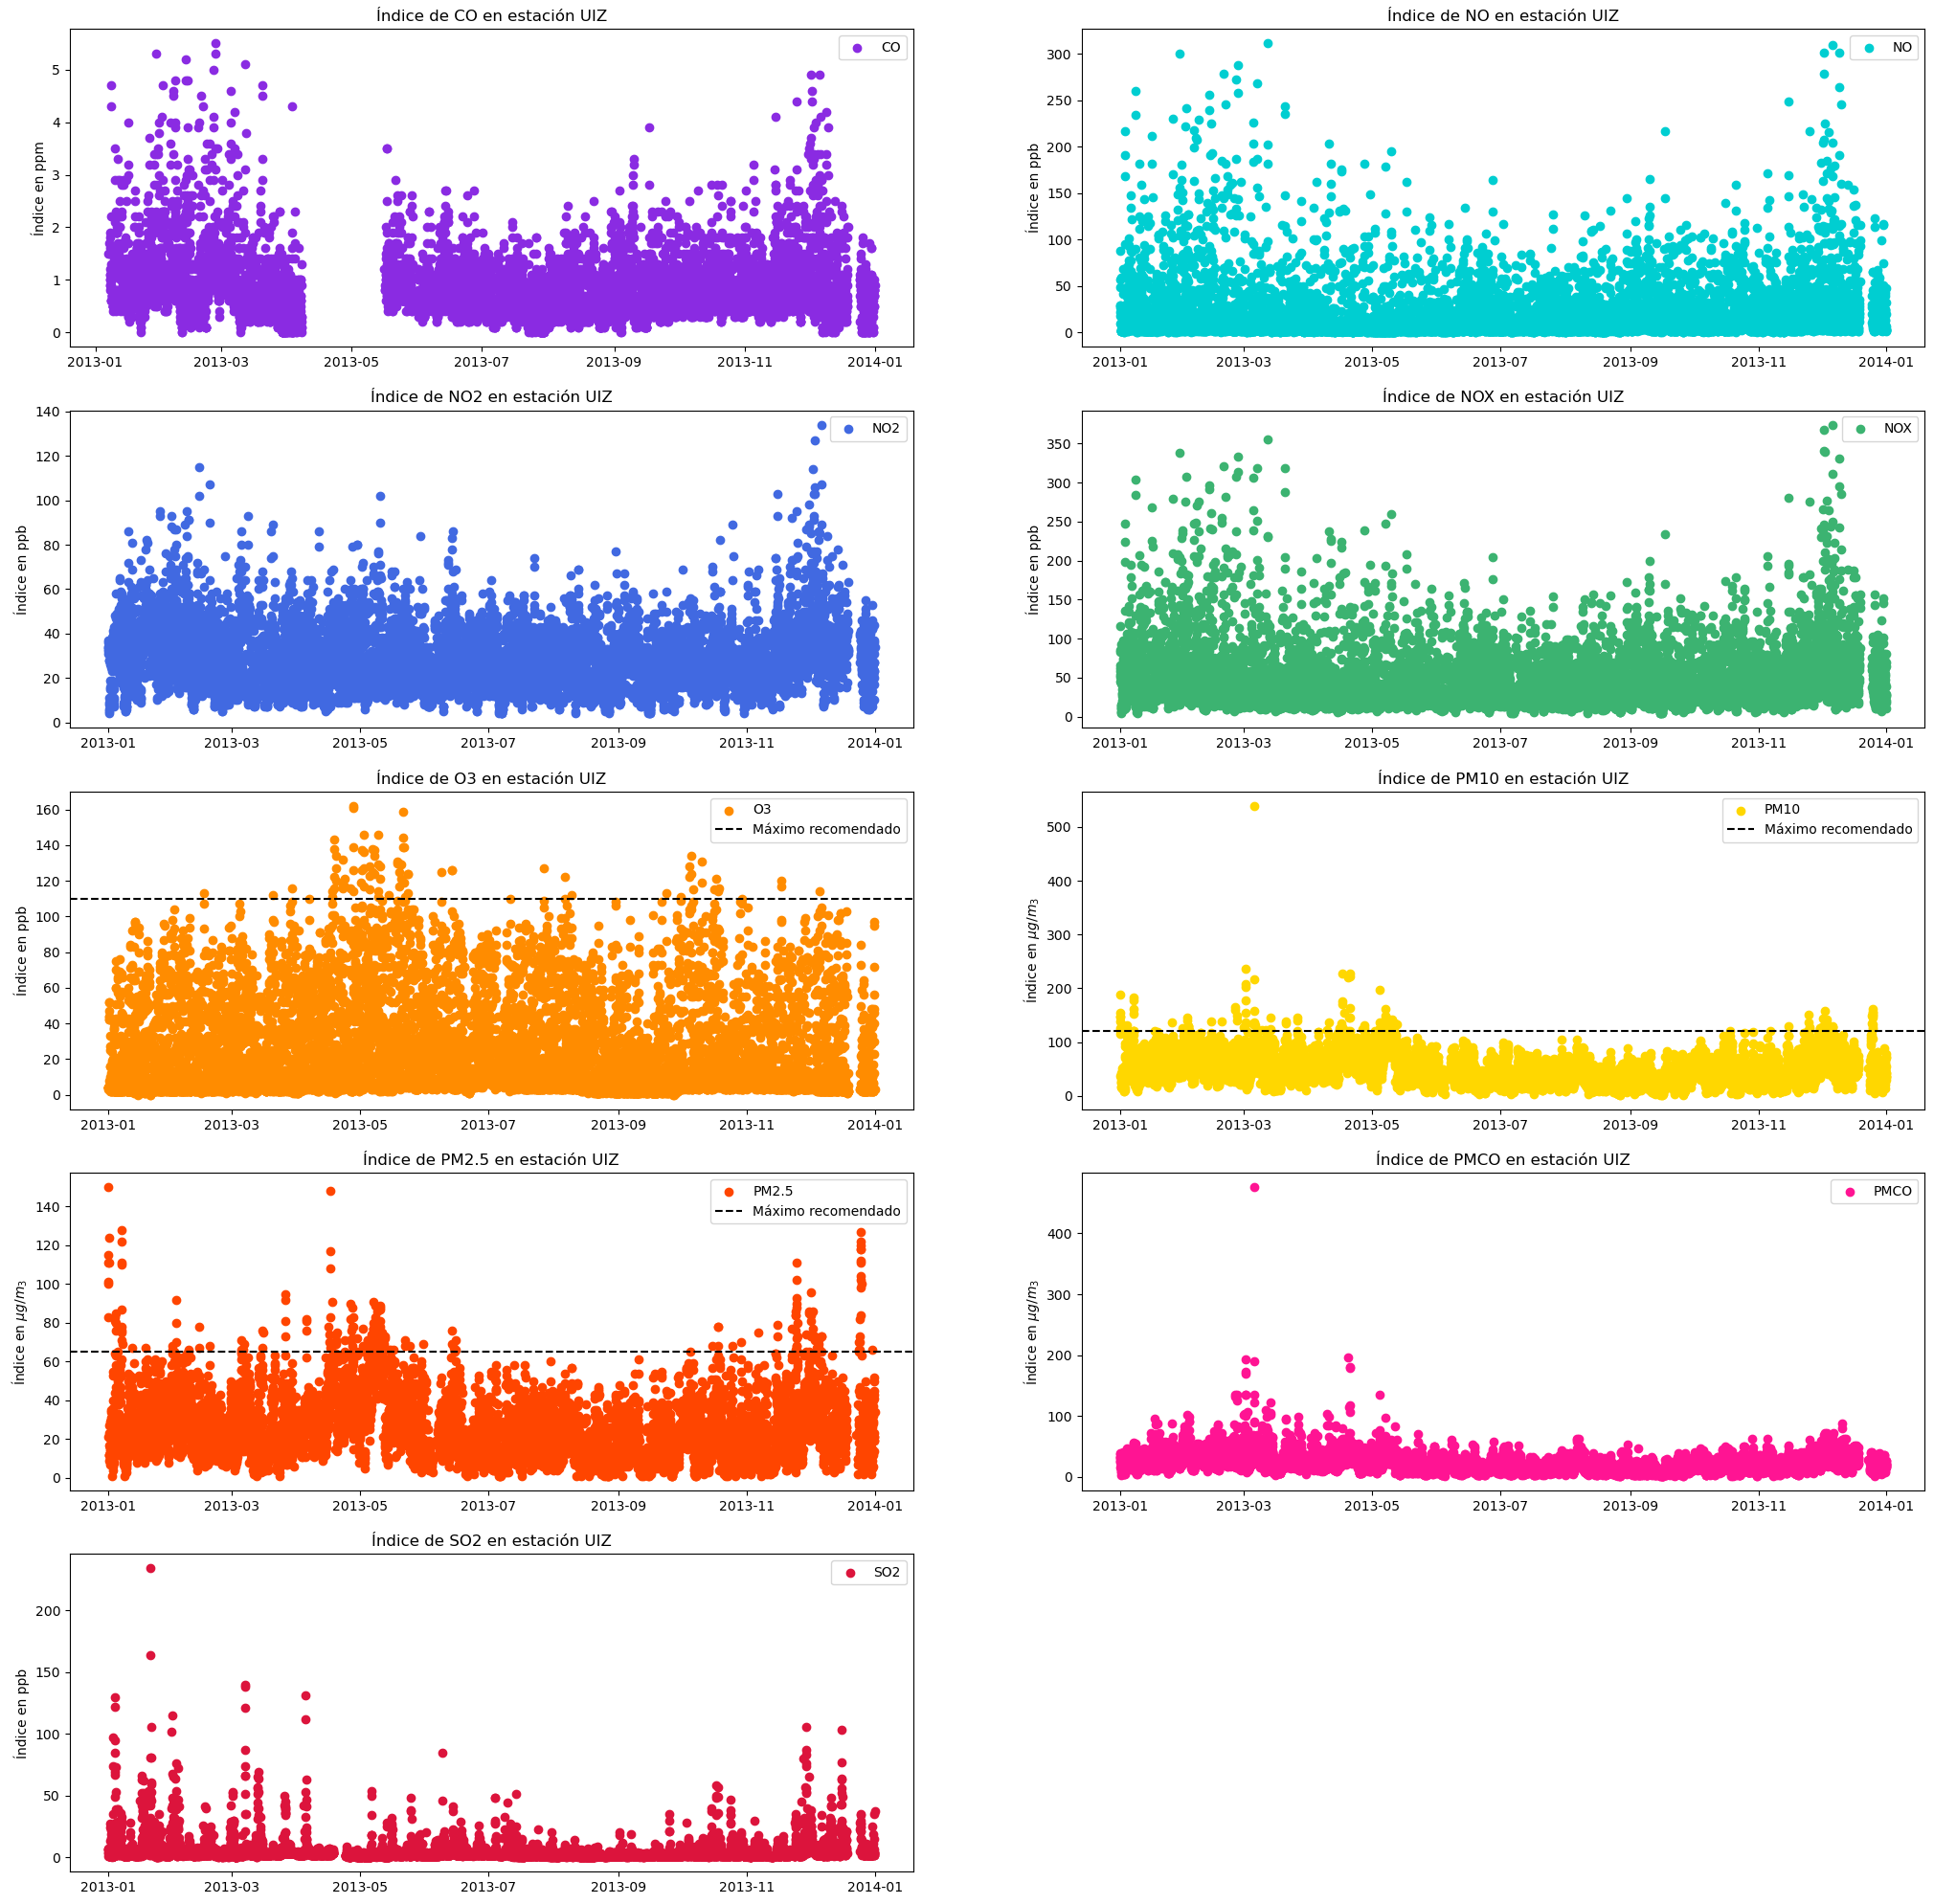

In [14]:

contaminantes = ['','CO','NO','NO2','NOX','O3','PM10','PM2.5','PMCO','SO2']
colors = ['','blueviolet','darkturquoise','royalblue','mediumseagreen','darkorange','gold','orangered','deeppink','crimson']
unit = ['','ppm','ppb','ppb','ppb','ppb','$\mu g /m_3$','$\mu g /m_3$','$\mu g /m_3$','ppb']
indmax = [0,0,0,0,0,110,120,65,0,0]
cols = best.columns

for element in zones:
    z = best.loc[best['zone'] == element]
    time = z.index.tolist()
    plt.figure(figsize=(25,25))
    for i in range(1,len(cols)):
        plt.subplot(5,2,1+(i-1))
        plt.scatter(time,z[cols[i]],color=colors[i], label = cols[i])
        if i == 5 or i == 6 or i ==7:
            plt.axhline(indmax[i],color='black',label='Máximo recomendado',linestyle='--')
        plt.title('Índice de ' + contaminantes[i] + ' en estación '+ element)
        plt.ylabel('Índice en ' + unit[i])
        plt.legend() 

# Modelo de Regresión

## 1995-2019

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix,roc_curve, auc
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint



In [16]:
import os
import glob

In [17]:
directory_path = "/Users/sam/Downloads/"  

polution3 = []


for year in range(1995, 2020):
    file_pattern = f"contaminantes_{year}.JSON"
    file_paths = glob.glob(os.path.join(directory_path, file_pattern))

    for file_path in file_paths:
        abs_file_path = os.path.abspath(file_path)
        with open(abs_file_path, 'r') as file:
            content = json.load(file)
            polution3.append(content)

print(len(polution3))

25


In [18]:
counts3 = {}
new3 = {}
dates = list()

for d in polution3:
    polution_measurements = d['pollutionMeasurements']['date']
    dates += list(polution_measurements.keys())

    for date, hours in polution_measurements.items():
        for contaminant, zones in hours.items():
            if contaminant not in counts3:
                counts3[contaminant] = {}
            if contaminant not in new3:
                new3[contaminant] = {}
            for zone, value in zones.items():
                if zone not in counts3[contaminant]:
                    counts3[contaminant][zone] = 0
                if zone not in new3[contaminant]:
                    new3[contaminant][zone] = []
                
                if len(value) != 0:
                    counts3[contaminant][zone] += 1
                new3[contaminant][zone].append(value)

In [19]:
counts_df3 = pd.DataFrame(counts3)
counts_df3['Total'] = counts_df3.sum(axis=1)

In [20]:


def color_by_column2(value, column):
    if column == 'Total':
        
        if value > 7000*9*25:
            color = 'lime'
        elif value > 6000*9*25:
            color = 'green'
        elif value > 5000*9*25:
            color = 'orange'
        else:
            color = 'red'
        
       
    else:
        if value > 7500*25:
            color = 'lime'
        elif value > 6750*25:
            color = 'green'
        elif value > 5000*25:
            color = 'orange'
        else:
            color = 'red'
        
            
    return 'background-color: %s' % color



In [21]:
counts_df3 = counts_df3.style.apply(lambda x: [color_by_column2(v, x.name) for v in x])
counts_df3

In [22]:
data = []

for contaminant, zones in new3.items():
    for zone, values in zones.items():
        for idx, value in enumerate(values):
           
            data.append({'zone': zone, 'contaminant': contaminant, 'value': value, 'idx': idx})


df = pd.DataFrame(data)

new_df3 = df.pivot(index=['zone', 'idx'], columns='contaminant', values='value')


new_df3 = new_df3.reset_index()
new_df3 = new_df3.drop(columns=['idx'])

for element in new_df3:
    if element != 'zone':
        new_df3[element] = pd.to_numeric(new_df3[element], errors='coerce')

In [23]:
new_df3

contaminant zone   CO  NO   NO2   NOX    O3  PM10  PM2.5  PMCO  SO2
0            ACO  NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  NaN
1            ACO  NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  NaN
2            ACO  NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  NaN
3            ACO  NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  NaN
4            ACO  NaN NaN   NaN   NaN   NaN   NaN    NaN   NaN  NaN
...          ...  ...  ..   ...   ...   ...   ...    ...   ...  ...
6960355      XAL  0.7 NaN  30.0  34.0  23.0   NaN    NaN   NaN  NaN
6960356      XAL  0.6 NaN  29.0  33.0  18.0   NaN    NaN   NaN  NaN
6960357      XAL  0.9 NaN  38.0  53.0   8.0   NaN    NaN   NaN  NaN
6960358      XAL  0.9 NaN  40.0  49.0   8.0   NaN    NaN   NaN  NaN
6960359      XAL  1.0 NaN  40.0  52.0   6.0   NaN    NaN   NaN  NaN

[6960360 rows x 10 columns]

In [24]:
g_zones = []
allzones = counts_df3.data.index
valores = counts_df3.data['Total']
for i in range(len(valores)):
   
    if (valores[i] > 6500*9*25).any():
        g_zones.append(allzones[i])
        
g_zones



['TLA', 'MER']

In [25]:
best3 = new_df3.loc[new_df3['zone'].isin(g_zones)].copy()
best3['dates'] = dates *len(g_zones)
best3['dates'] = best3['dates'].str.replace(' 24:00', ' 00:00')
best3['dates'] = pd.to_datetime(best3['dates'])
best3.set_index('dates').sort_index()
best3

contaminant zone   CO     NO   NO2   NOX    O3   PM10  PM2.5  PMCO   SO2  \
3163200      MER  1.3   96.0  36.0  79.0  11.0  124.0    NaN  28.0  16.0   
3163201      MER  1.3   51.0  35.0  69.0  12.0  125.0    NaN  47.0  15.0   
3163202      MER  1.2   43.0  34.0  66.0  12.0  135.0    NaN  45.0  17.0   
3163203      MER  1.3  101.0  34.0  71.0  12.0  132.0    NaN  43.0  17.0   
3163204      MER  1.5  146.0  29.0  59.0  12.0  135.0    NaN  37.0  11.0   
...          ...  ...    ...   ...   ...   ...    ...    ...   ...   ...   
5694787      TLA  0.8    NaN  47.0  58.0  14.0   24.0    NaN   NaN  19.0   
5694788      TLA  1.2    NaN  55.0  87.0   2.0   79.0    NaN   NaN  11.0   
5694789      TLA  1.2    NaN  46.0  80.0   3.0   86.0    NaN   NaN  12.0   
5694790      TLA  0.9    NaN  36.0  58.0   3.0   63.0    NaN   NaN  16.0   
5694791      TLA  0.7    NaN  33.0  43.0   4.0   48.0    NaN   NaN  15.0   

contaminant               dates  
3163200     1995-01-01 01:00:00  
3163201     1995-01-01 02:00:00  
3163202     1995-01-01 03:00:00  
3163203     1995-01-01 04:00:00  
3163204     1995-01-01 05:00:00  
...                         ...  
5694787     2019-12-31 20:00:00  
5694788     2019-12-31 21:00:00  
5694789     2019-12-31 22:00:00  
5694790     2019-12-31 23:00:00  
5694791     2019-12-31 00:00:00  

[438288 rows x 11 columns]

In [26]:
metero = []
for year in range(1995, 2020):
    file_pattern = f"meteorología_{year}.JSON"
    file_paths = glob.glob(os.path.join(directory_path, file_pattern))

    for file_path in file_paths:
        abs_file_path = os.path.abspath(file_path)
        with open(abs_file_path, 'r') as file:
            content = json.load(file)
            metero.append(content)

print(len(metero))

25


In [27]:

temp = {}
dates = list()

for d in metero:
    polution_measurements = d['pollutionMeasurements']['date']
    dates += list(polution_measurements.keys())

    for date, hours in polution_measurements.items():
        for contaminant, zones in hours.items():
            if contaminant not in temp:
                temp[contaminant] = {}
            
            for zone, value in zones.items():
                if zone not in temp[contaminant]:
                    temp[contaminant][zone] = []
        
                
           
                temp[contaminant][zone].append(value)

In [28]:
data = []

for contaminant, zones in temp.items():
    for zone, values in zones.items():
        for idx, value in enumerate(values):
           
            data.append({'zone': zone, 'contaminant': contaminant, 'value': value, 'idx': idx})


df = pd.DataFrame(data)

temp1 = df.pivot(index=['zone', 'idx'], columns='contaminant', values='value')


temp1 = temp1.reset_index()
temp1 = temp1.drop(columns=['idx'])

for element in temp1:
    if element != 'zone':
        temp1[element] = pd.to_numeric(temp1[element], errors='coerce')



In [29]:
temp1

contaminant zone  PBa    RH   TMP   WDR  WSP
0            ACO  NaN   NaN   NaN   NaN  NaN
1            ACO  NaN   NaN   NaN   NaN  NaN
2            ACO  NaN   NaN   NaN   NaN  NaN
3            ACO  NaN   NaN   NaN   NaN  NaN
4            ACO  NaN   NaN   NaN   NaN  NaN
...          ...  ...   ...   ...   ...  ...
3618691      XAL  NaN  41.0  19.1  28.0  3.6
3618692      XAL  NaN  48.0  17.5  28.0  3.4
3618693      XAL  NaN  49.0  17.0   1.0  1.6
3618694      XAL  NaN  52.0  16.5  30.0  1.5
3618695      XAL  NaN  54.0  15.6  26.0  2.4

[3618696 rows x 6 columns]

In [30]:
temp1 = temp1.loc[temp1['zone'].isin(g_zones)].copy()
temp1['dates'] = dates *len(temp1['zone'].unique())
temp1['dates'] = temp1['dates'].str.replace(' 24:00', ' 00:00')
temp1['dates'] = pd.to_datetime(temp1['dates'])
temp1.set_index('dates').sort_index()
temp1

contaminant zone    PBa    RH   TMP    WDR  WSP               dates
1211112      MER  588.0  57.0  14.0  309.0  2.0 1995-01-01 01:00:00
1211113      MER  587.0  59.0  13.2  308.0  2.1 1995-01-01 02:00:00
1211114      MER  587.0  63.0  12.5  317.0  2.2 1995-01-01 03:00:00
1211115      MER  587.0  66.0  11.8  324.0  1.3 1995-01-01 04:00:00
1211116      MER  587.0  74.0  10.0  173.0  1.1 1995-01-01 05:00:00
...          ...    ...   ...   ...    ...  ...                 ...
3009403      TLA    NaN  34.0  19.3  345.0  2.1 2019-12-31 20:00:00
3009404      TLA    NaN  37.0  18.1  320.0  1.8 2019-12-31 21:00:00
3009405      TLA    NaN  43.0  16.8  345.0  1.2 2019-12-31 22:00:00
3009406      TLA    NaN  45.0  15.4  315.0  1.8 2019-12-31 23:00:00
3009407      TLA    NaN  48.0  14.3  320.0  1.4 2019-12-31 00:00:00

[438288 rows x 7 columns]

In [31]:
best3 = new_df3.loc[new_df3['zone'].isin(temp1['zone'].unique())].copy()
best3

contaminant zone   CO     NO   NO2   NOX    O3   PM10  PM2.5  PMCO   SO2
3163200      MER  1.3   96.0  36.0  79.0  11.0  124.0    NaN  28.0  16.0
3163201      MER  1.3   51.0  35.0  69.0  12.0  125.0    NaN  47.0  15.0
3163202      MER  1.2   43.0  34.0  66.0  12.0  135.0    NaN  45.0  17.0
3163203      MER  1.3  101.0  34.0  71.0  12.0  132.0    NaN  43.0  17.0
3163204      MER  1.5  146.0  29.0  59.0  12.0  135.0    NaN  37.0  11.0
...          ...  ...    ...   ...   ...   ...    ...    ...   ...   ...
5694787      TLA  0.8    NaN  47.0  58.0  14.0   24.0    NaN   NaN  19.0
5694788      TLA  1.2    NaN  55.0  87.0   2.0   79.0    NaN   NaN  11.0
5694789      TLA  1.2    NaN  46.0  80.0   3.0   86.0    NaN   NaN  12.0
5694790      TLA  0.9    NaN  36.0  58.0   3.0   63.0    NaN   NaN  16.0
5694791      TLA  0.7    NaN  33.0  43.0   4.0   48.0    NaN   NaN  15.0

[438288 rows x 10 columns]

In [32]:
best3.reset_index(inplace=True)
temp1.reset_index(inplace=True)
for column in temp1:
    best3[column] = temp1[column]

In [33]:
best3.set_index('dates', inplace=True)
best3.drop(columns=['index','WDR','WSP'], inplace=True)
best3

contaminant         zone   CO     NO   NO2   NOX    O3   PM10  PM2.5  PMCO  \
dates                                                                        
1995-01-01 01:00:00  MER  1.3   96.0  36.0  79.0  11.0  124.0    NaN  28.0   
1995-01-01 02:00:00  MER  1.3   51.0  35.0  69.0  12.0  125.0    NaN  47.0   
1995-01-01 03:00:00  MER  1.2   43.0  34.0  66.0  12.0  135.0    NaN  45.0   
1995-01-01 04:00:00  MER  1.3  101.0  34.0  71.0  12.0  132.0    NaN  43.0   
1995-01-01 05:00:00  MER  1.5  146.0  29.0  59.0  12.0  135.0    NaN  37.0   
...                  ...  ...    ...   ...   ...   ...    ...    ...   ...   
2019-12-31 20:00:00  TLA  0.8    NaN  47.0  58.0  14.0   24.0    NaN   NaN   
2019-12-31 21:00:00  TLA  1.2    NaN  55.0  87.0   2.0   79.0    NaN   NaN   
2019-12-31 22:00:00  TLA  1.2    NaN  46.0  80.0   3.0   86.0    NaN   NaN   
2019-12-31 23:00:00  TLA  0.9    NaN  36.0  58.0   3.0   63.0    NaN   NaN   
2019-12-31 00:00:00  TLA  0.7    NaN  33.0  43.0   4.0   48.0    NaN   NaN   

contaminant           SO2    PBa    RH   TMP  
dates                                         
1995-01-01 01:00:00  16.0  588.0  57.0  14.0  
1995-01-01 02:00:00  15.0  587.0  59.0  13.2  
1995-01-01 03:00:00  17.0  587.0  63.0  12.5  
1995-01-01 04:00:00  17.0  587.0  66.0  11.8  
1995-01-01 05:00:00  11.0  587.0  74.0  10.0  
...                   ...    ...   ...   ...  
2019-12-31 20:00:00  19.0    NaN  34.0  19.3  
2019-12-31 21:00:00  11.0    NaN  37.0  18.1  
2019-12-31 22:00:00  12.0    NaN  43.0  16.8  
2019-12-31 23:00:00  16.0    NaN  45.0  15.4  
2019-12-31 00:00:00  15.0    NaN  48.0  14.3  

[438288 rows x 13 columns]

In [34]:
best3.interpolate(method='time', inplace=True)
best3.fillna(best.mean(numeric_only=True), inplace=True)
best3 = best3.groupby('zone').resample('D').max(numeric_only=True)


In [35]:
best3

contaminant        CO     NO    NO2    NOX     O3   PM10      PM2.5  PMCO  \
zone dates                                                                  
MER  1995-01-01   2.1  146.0   81.0   89.0  142.0  375.0  24.774725  51.0   
     1995-01-02   4.6  183.0   84.0  151.0  143.0  201.0  24.774725  32.0   
     1995-01-03   6.5  101.0  101.0  231.0   84.0  188.0  24.774725  65.0   
     1995-01-04  10.1  162.0  178.0  341.0  132.0  339.0  24.774725  57.0   
     1995-01-05  10.0   65.0  170.0  312.0  168.0  159.0  24.774725  50.0   
...               ...    ...    ...    ...    ...    ...        ...   ...   
TLA  2019-12-27   2.3   22.0   70.0  304.0   81.0  120.0  24.000000  34.0   
     2019-12-28   1.5   22.0   70.0  193.0   44.0   85.0  24.000000  34.0   
     2019-12-29   1.7   22.0   49.0  159.0   26.0   75.0  24.000000  34.0   
     2019-12-30   1.8   22.0   39.0  210.0   33.0   62.0  24.000000  34.0   
     2019-12-31   1.3   22.0   55.0  159.0   53.0   86.0  24.000000  34.0   

contaminant        SO2    PBa    RH   TMP  
zone dates                                 
MER  1995-01-01   66.0  588.0  82.0  20.4  
     1995-01-02   39.0  587.0  83.0  19.1  
     1995-01-03   43.0  586.0  80.0  18.7  
     1995-01-04  103.0  588.0  77.0  19.4  
     1995-01-05   52.0  588.0  72.0  20.4  
...                ...    ...   ...   ...  
TLA  2019-12-27   19.0  586.0  63.0  22.8  
     2019-12-28   11.0  586.0  68.0  21.8  
     2019-12-29   11.0  586.0  63.0  19.3  
     2019-12-30    8.0  586.0  64.0  23.0  
     2019-12-31   29.0  586.0  68.0  24.2  

[18262 rows x 12 columns]

In [36]:

best3.reset_index(inplace=True)
best3.drop([], axis=1)
best3['Cont'] = ((best3['O3'].fillna(0) >= 110) |
                  (best3['PM10'].fillna(0) >= 120) |
                  (best3['PM2.5'].fillna(0) >= 65)).astype(int)

best3['QuasiCont'] = ((best3['O3'].fillna(0) > 90) & (best3['O3'].fillna(0) < 110) |
                       (best3['PM10'].fillna(0) > 100) & (best3['PM10'].fillna(0) < 120) |
                       (best3['PM2.5'].fillna(0) > 50) & (best3['PM2.5'].fillna(0) < 65)).astype(int)

best3

contaminant zone      dates    CO     NO    NO2    NOX     O3   PM10  \
0            MER 1995-01-01   2.1  146.0   81.0   89.0  142.0  375.0   
1            MER 1995-01-02   4.6  183.0   84.0  151.0  143.0  201.0   
2            MER 1995-01-03   6.5  101.0  101.0  231.0   84.0  188.0   
3            MER 1995-01-04  10.1  162.0  178.0  341.0  132.0  339.0   
4            MER 1995-01-05  10.0   65.0  170.0  312.0  168.0  159.0   
...          ...        ...   ...    ...    ...    ...    ...    ...   
18257        TLA 2019-12-27   2.3   22.0   70.0  304.0   81.0  120.0   
18258        TLA 2019-12-28   1.5   22.0   70.0  193.0   44.0   85.0   
18259        TLA 2019-12-29   1.7   22.0   49.0  159.0   26.0   75.0   
18260        TLA 2019-12-30   1.8   22.0   39.0  210.0   33.0   62.0   
18261        TLA 2019-12-31   1.3   22.0   55.0  159.0   53.0   86.0   

contaminant      PM2.5  PMCO    SO2    PBa    RH   TMP  Cont  QuasiCont  
0            24.774725  51.0   66.0  588.0  82.0  20.4     1          0  
1            24.774725  32.0   39.0  587.0  83.0  19.1     1          0  
2            24.774725  65.0   43.0  586.0  80.0  18.7     1          0  
3            24.774725  57.0  103.0  588.0  77.0  19.4     1          0  
4            24.774725  50.0   52.0  588.0  72.0  20.4     1          0  
...                ...   ...    ...    ...   ...   ...   ...        ...  
18257        24.000000  34.0   19.0  586.0  63.0  22.8     1          0  
18258        24.000000  34.0   11.0  586.0  68.0  21.8     0          0  
18259        24.000000  34.0   11.0  586.0  63.0  19.3     0          0  
18260        24.000000  34.0    8.0  586.0  64.0  23.0     0          0  
18261        24.000000  34.0   29.0  586.0  68.0  24.2     0          0  

[18262 rows x 16 columns]

In [37]:
best3['keep'] = 0

event_indices = best3[(best3['Cont'] == 1) | (best3['QuasiCont'] == 1)].index

event_mask = best3.index.isin(event_indices)

best3.loc[event_mask, 'keep'] = 1

next_mask = np.roll(event_mask, 1)
next_mask[:7] = False

best3.loc[next_mask & (best3['zone'] == best3['zone'].shift(1)), 'keep'] = 1

prev_mask = np.roll(event_mask, -1)
prev_mask[-7:] = False

best3.loc[prev_mask & (best3['zone'] == best3['zone'].shift(-1)), 'keep'] = 1

best_w3 = best3[best3['keep'] == 1].copy()

best_w3.drop(columns='keep', inplace=True)
best_w3

contaminant zone      dates    CO     NO    NO2    NOX     O3   PM10  \
0            MER 1995-01-01   2.1  146.0   81.0   89.0  142.0  375.0   
1            MER 1995-01-02   4.6  183.0   84.0  151.0  143.0  201.0   
2            MER 1995-01-03   6.5  101.0  101.0  231.0   84.0  188.0   
3            MER 1995-01-04  10.1  162.0  178.0  341.0  132.0  339.0   
4            MER 1995-01-05  10.0   65.0  170.0  312.0  168.0  159.0   
...          ...        ...   ...    ...    ...    ...    ...    ...   
18253        TLA 2019-12-23   1.5   22.0   69.0  191.0   58.0  116.0   
18254        TLA 2019-12-24   1.7   22.0   52.0  173.0   36.0   78.0   
18256        TLA 2019-12-26   1.6   22.0   75.0  193.0   78.0  112.0   
18257        TLA 2019-12-27   2.3   22.0   70.0  304.0   81.0  120.0   
18258        TLA 2019-12-28   1.5   22.0   70.0  193.0   44.0   85.0   

contaminant      PM2.5  PMCO    SO2    PBa    RH   TMP  Cont  QuasiCont  
0            24.774725  51.0   66.0  588.0  82.0  20.4     1          0  
1            24.774725  32.0   39.0  587.0  83.0  19.1     1          0  
2            24.774725  65.0   43.0  586.0  80.0  18.7     1          0  
3            24.774725  57.0  103.0  588.0  77.0  19.4     1          0  
4            24.774725  50.0   52.0  588.0  72.0  20.4     1          0  
...                ...   ...    ...    ...   ...   ...   ...        ...  
18253        24.000000  34.0   43.0  586.0  75.0  20.9     0          1  
18254        24.000000  34.0   10.0  586.0  69.0  21.1     0          0  
18256        24.000000  34.0   13.0  586.0  60.0  21.7     0          1  
18257        24.000000  34.0   19.0  586.0  63.0  22.8     1          0  
18258        24.000000  34.0   11.0  586.0  68.0  21.8     0          0  

[16016 rows x 16 columns]

In [38]:

best_w3['nextIsCont'] = best_w3['Cont'].shift(-1)


best_w3.dropna(subset=['nextIsCont'], inplace=True)


best_w3['QuasiToCont'] = 0


best_w3.loc[(best_w3['QuasiCont'] == 1) & (best_w3['nextIsCont'] == 1), 'QuasiToCont'] = 2


best_w3.loc[((best_w3['nextIsCont'] == 0) & (best_w3['QuasiCont'] == 1)), 'QuasiToCont'] = 1



best_w3



contaminant zone      dates    CO     NO    NO2    NOX     O3   PM10  \
0            MER 1995-01-01   2.1  146.0   81.0   89.0  142.0  375.0   
1            MER 1995-01-02   4.6  183.0   84.0  151.0  143.0  201.0   
2            MER 1995-01-03   6.5  101.0  101.0  231.0   84.0  188.0   
3            MER 1995-01-04  10.1  162.0  178.0  341.0  132.0  339.0   
4            MER 1995-01-05  10.0   65.0  170.0  312.0  168.0  159.0   
...          ...        ...   ...    ...    ...    ...    ...    ...   
18252        TLA 2019-12-22   1.1   22.0   51.0   84.0   25.0   69.0   
18253        TLA 2019-12-23   1.5   22.0   69.0  191.0   58.0  116.0   
18254        TLA 2019-12-24   1.7   22.0   52.0  173.0   36.0   78.0   
18256        TLA 2019-12-26   1.6   22.0   75.0  193.0   78.0  112.0   
18257        TLA 2019-12-27   2.3   22.0   70.0  304.0   81.0  120.0   

contaminant      PM2.5  PMCO    SO2    PBa    RH   TMP  Cont  QuasiCont  \
0            24.774725  51.0   66.0  588.0  82.0  20.4     1          0   
1            24.774725  32.0   39.0  587.0  83.0  19.1     1          0   
2            24.774725  65.0   43.0  586.0  80.0  18.7     1          0   
3            24.774725  57.0  103.0  588.0  77.0  19.4     1          0   
4            24.774725  50.0   52.0  588.0  72.0  20.4     1          0   
...                ...   ...    ...    ...   ...   ...   ...        ...   
18252        24.000000  34.0   45.0  586.0  83.0  14.6     0          0   
18253        24.000000  34.0   43.0  586.0  75.0  20.9     0          1   
18254        24.000000  34.0   10.0  586.0  69.0  21.1     0          0   
18256        24.000000  34.0   13.0  586.0  60.0  21.7     0          1   
18257        24.000000  34.0   19.0  586.0  63.0  22.8     1          0   

contaminant  nextIsCont  QuasiToCont  
0                   1.0            0  
1                   1.0            0  
2                   1.0            0  
3                   1.0            0  
4                   1.0            0  
...                 ...          ...  
18252               0.0            0  
18253               0.0            1  
18254               0.0            0  
18256               1.0            2  
18257               0.0            0  

[16015 rows x 18 columns]

In [39]:
event_indices = best_w3[best_w3['QuasiCont'] == 1].index

event_mask = best_w3.index.isin(event_indices)

best_w3.loc[event_mask, 'keep'] = 1

next_mask = np.roll(event_mask, 1)
next_mask[:5] = False

best_w3.loc[next_mask & (best_w3['zone'] == best_w3['zone'].shift(1)), 'keep'] = 1

prev_mask = np.roll(event_mask, -1)
prev_mask[-5:] = False

best_w3.loc[prev_mask & (best_w3['zone'] == best_w3['zone'].shift(-1)), 'keep'] = 1

best_w3 = best_w3[best_w3['keep'] == 1].copy()

best_w3.drop(columns='keep', inplace=True)
best_w3

contaminant zone      dates    CO     NO    NO2    NOX     O3   PM10  \
19           MER 1995-01-20  15.4  310.0  142.0  470.0  219.0  164.0   
20           MER 1995-01-21  11.0  252.0  129.0  267.0  178.0  116.0   
21           MER 1995-01-22   3.1  278.0   70.0  120.0  137.0  138.0   
22           MER 1995-01-23   7.1  132.0  111.0  321.0  119.0  118.0   
23           MER 1995-01-24   6.7  139.0  145.0  300.0  197.0  186.0   
...          ...        ...   ...    ...    ...    ...    ...    ...   
18248        TLA 2019-12-18   0.6   22.0   73.0  118.0   28.0  151.0   
18253        TLA 2019-12-23   1.5   22.0   69.0  191.0   58.0  116.0   
18254        TLA 2019-12-24   1.7   22.0   52.0  173.0   36.0   78.0   
18256        TLA 2019-12-26   1.6   22.0   75.0  193.0   78.0  112.0   
18257        TLA 2019-12-27   2.3   22.0   70.0  304.0   81.0  120.0   

contaminant      PM2.5  PMCO   SO2    PBa    RH   TMP  Cont  QuasiCont  \
19           24.774725  80.0  51.0  590.0  79.0  21.2     1          0   
20           24.774725  78.0  35.0  590.0  77.0  22.4     1          1   
21           24.774725  78.0  31.0  589.0  76.0  22.8     1          0   
22           24.774725  73.0  33.0  589.0  74.0  20.3     1          1   
23           24.774725  92.0  85.0  589.0  82.0  21.4     1          0   
...                ...   ...   ...    ...   ...   ...   ...        ...   
18248        24.000000  34.0  61.0  586.0  82.0  16.7     1          0   
18253        24.000000  34.0  43.0  586.0  75.0  20.9     0          1   
18254        24.000000  34.0  10.0  586.0  69.0  21.1     0          0   
18256        24.000000  34.0  13.0  586.0  60.0  21.7     0          1   
18257        24.000000  34.0  19.0  586.0  63.0  22.8     1          0   

contaminant  nextIsCont  QuasiToCont  
19                  1.0            0  
20                  1.0            2  
21                  1.0            0  
22                  1.0            2  
23                  1.0            0  
...                 ...          ...  
18248               1.0            0  
18253               0.0            1  
18254               0.0            0  
18256               1.0            2  
18257               0.0            0  

[13302 rows x 18 columns]

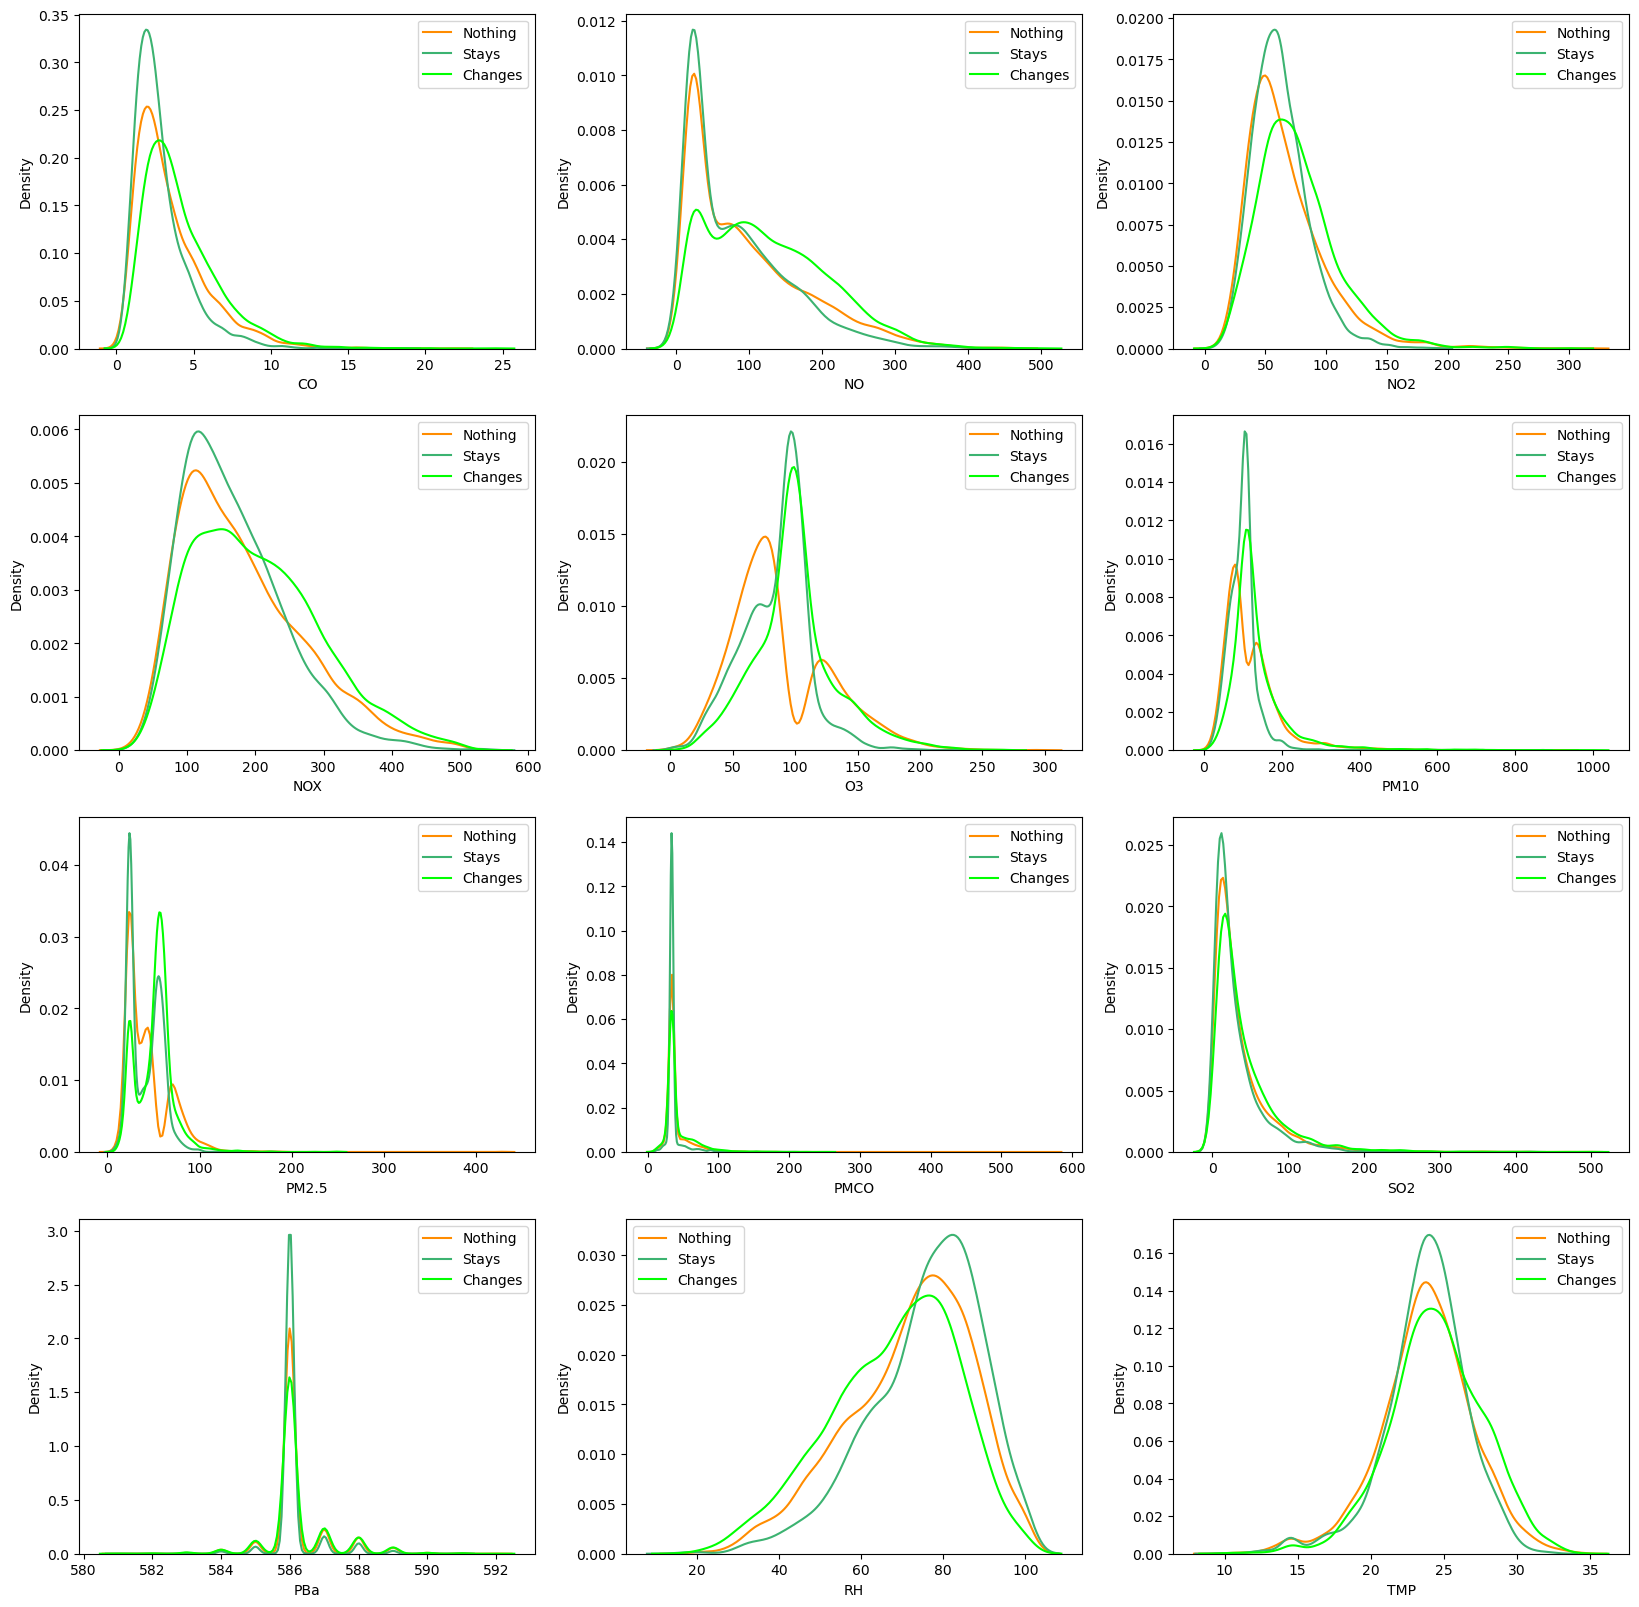

In [40]:
from seaborn import kdeplot
df_0 = best_w3[best_w3.QuasiToCont == 0]
df_1 = best_w3[best_w3.QuasiToCont == 1]
df_2 = best_w3[best_w3.QuasiToCont == 2]

columnas = best_w3.columns[:-1]
plt.figure(figsize=(20,20))
count = 1
omit = ['dates','zone','Cont', 'nextIsCont', 'QuasiToCont','QuasiCont']


for i in best_w3:
    if i not in omit:
        plt.subplot(4,3,count)
        kdeplot(df_0[i], label='Nothing',color='darkorange')
        kdeplot(df_1[i], label='Stays',color='mediumseagreen')
        kdeplot(df_2[i], label='Changes',color='lime')
        plt.legend()
        count += 1
plt.show()

In [41]:
print(best_w3['QuasiToCont'].value_counts())

0    6051
2    4269
1    2982
Name: QuasiToCont, dtype: int64


In [42]:
par = ['dates','zone','Cont', 'nextIsCont', 'QuasiToCont',]
X = best_w3.drop(par, axis=1)
y = best_w3['QuasiToCont']




In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Funciones para Graficar

In [44]:
def matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de confusión')
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()



In [45]:
def roc_auc_graph (model,X_test,y_test):
    from sklearn.preprocessing import label_binarize
    from itertools import cycle

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  
    y_score = model.decision_function(X_test)

    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC para múltiples clases')
    plt.legend(loc="lower right")
    plt.show()

In [46]:
def roc_auc_graphTree(model, X_test, y_test):
    from sklearn.preprocessing import label_binarize
    from itertools import cycle

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  
    y_score = model.predict_proba(X_test)  # change here

    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()




In [47]:

from itertools import cycle

def roc_auc_graphNB(model, X_test, y_test):
    from sklearn.preprocessing import label_binarize

    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  
    y_prob = model.predict_proba(X_test)

    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes')
    plt.legend(loc="lower right")
    plt.show()



### VSM

In [48]:

parameters = {
    'C': uniform(loc=0, scale=10),
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': uniform(loc=0, scale=1),
    'class_weight': ['balanced']  
}

model_svm = RandomizedSearchCV(svm.SVC(), param_distributions=parameters, n_iter=10, cv=5, n_jobs=-1)

In [49]:
model_svm = model_svm.fit(X_train , y_train)

In [50]:
y_pred = model_svm.predict(X_test)


In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.97%


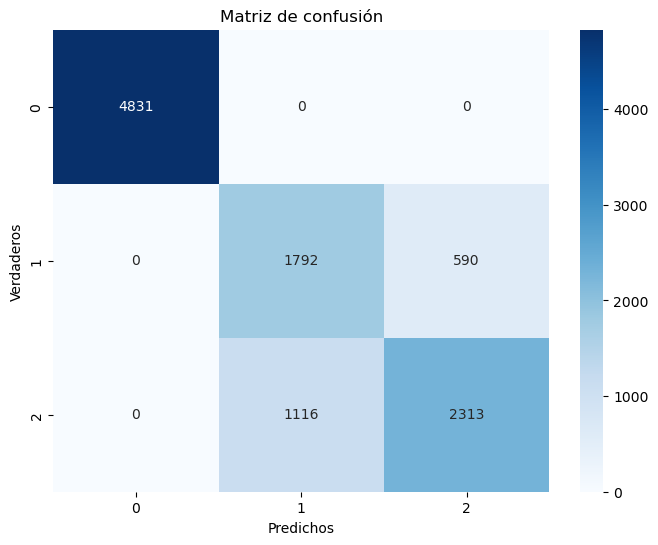

In [52]:
matrix(y_test,y_pred)

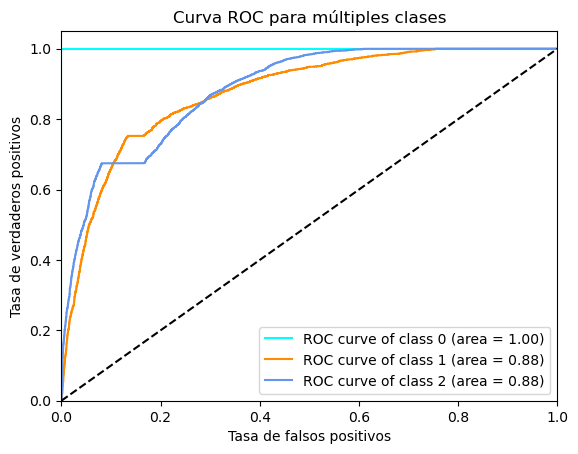

In [53]:
roc_auc_graph(model_svm,X_test,y_test)


### RandomForest

In [54]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 100),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5, 0.75]
}

rf = RandomForestClassifier(random_state=42)

model_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)



In [55]:
model_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29ed5cbb0>,
                                        'max_features': ['sqrt', 0.5, 0.75],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29f3e4430>},
                   random_state=42)

In [56]:
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.35%


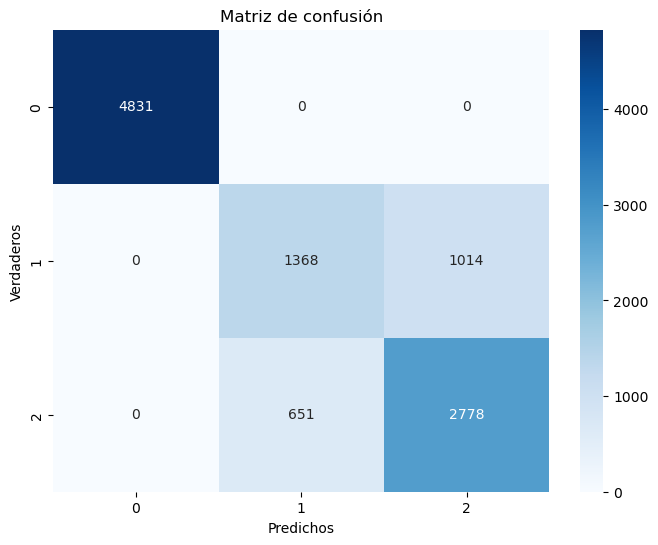

In [57]:
matrix(y_test,y_pred)

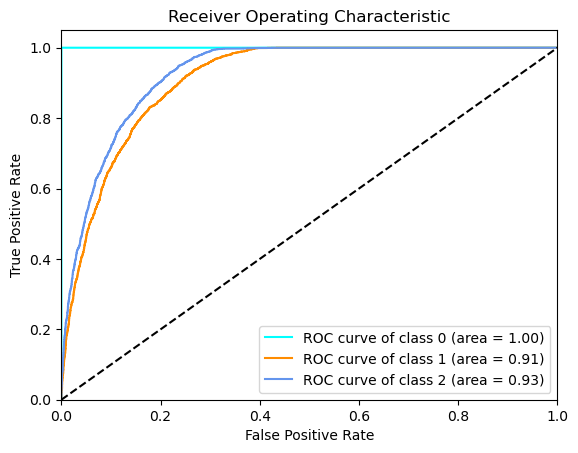

In [58]:
roc_auc_graphTree(model_rf,X_test,y_test)


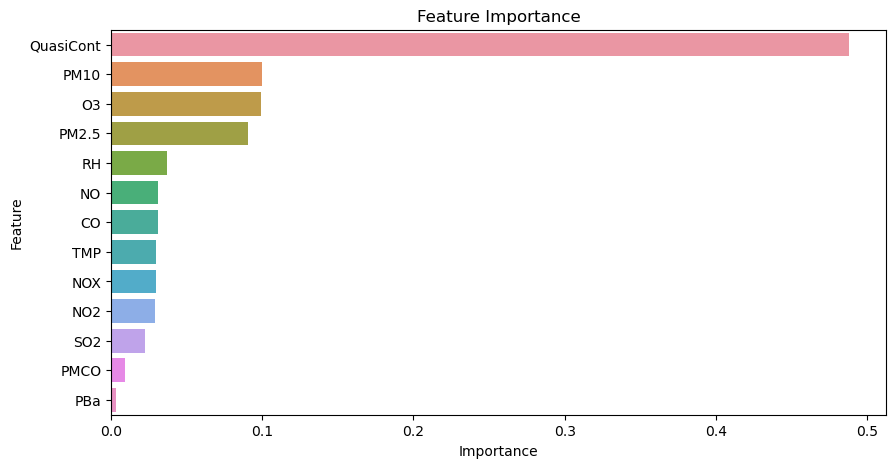

In [59]:

best_model = model_rf.best_estimator_

importances = pd.DataFrame({'feature': X_train.columns, 'importance': best_model.feature_importances_})

importances = importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 5))  
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Regresión Logística

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

In [61]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': uniform(loc=0, scale=4),
    'fit_intercept': [True, False],
}

model = LogisticRegression()

model_rl = RandomizedSearchCV(model, param_dist, cv=5, n_iter=50)



In [62]:
model_rl.fit(X_train, y_train)

/Users/sam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2a1fc50f0>,
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None]})

In [63]:
y_pred = model_rl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.73%


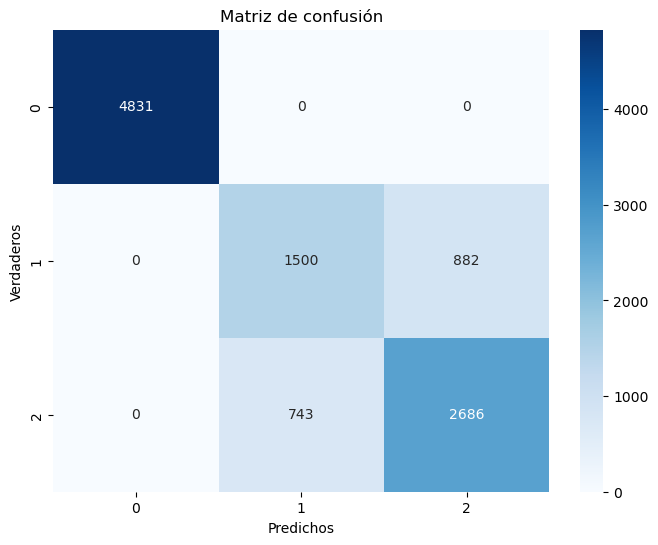

In [64]:
matrix(y_test, y_pred)



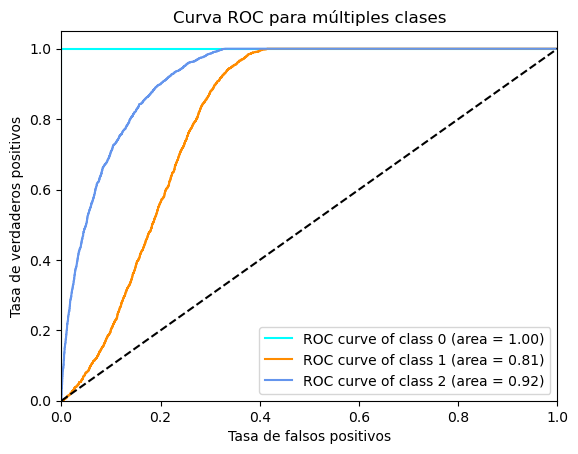

In [65]:
roc_auc_graph(model_rl,X_test,y_test)

Text(0.5, 1.0, 'Histogram of Predicted Probabilities')

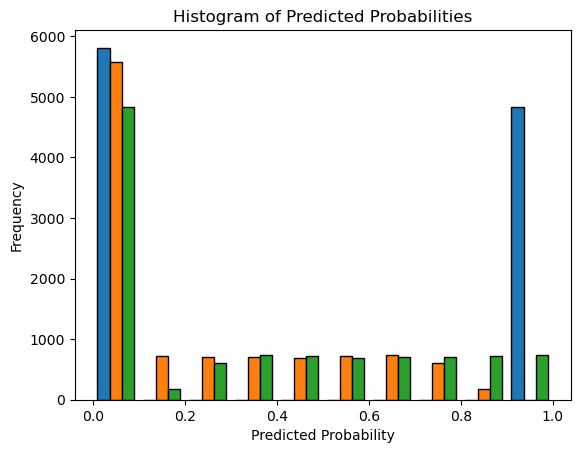

In [66]:
y_proba = model_rl.predict_proba(X_test)
plt.hist(y_proba, bins=10, edgecolor='k')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')

### Naive Bayes

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [68]:
nb_params = {'var_smoothing': [1e-09, 1e-08, 1e-07]}
model_nb = RandomizedSearchCV(GaussianNB(), nb_params, n_iter=3, cv=5, n_jobs=-1, verbose=1)

In [69]:
model_nb.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=3, n_jobs=-1,
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07]},
                   verbose=1)

In [70]:
y_pred = model_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.85%


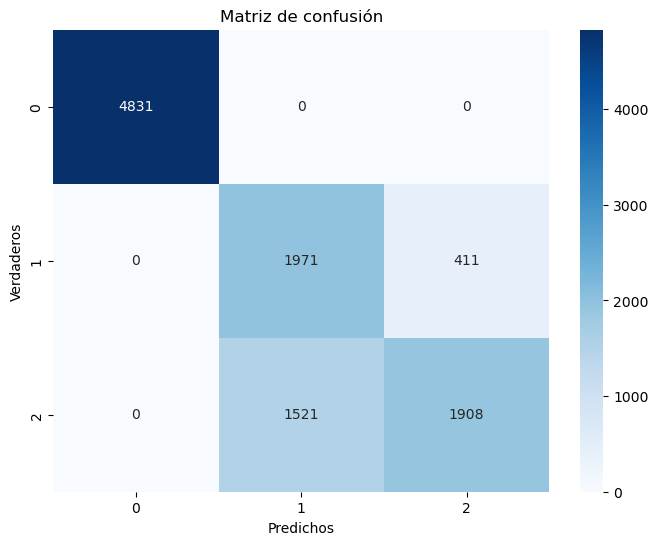

In [71]:
matrix(y_test, y_pred)

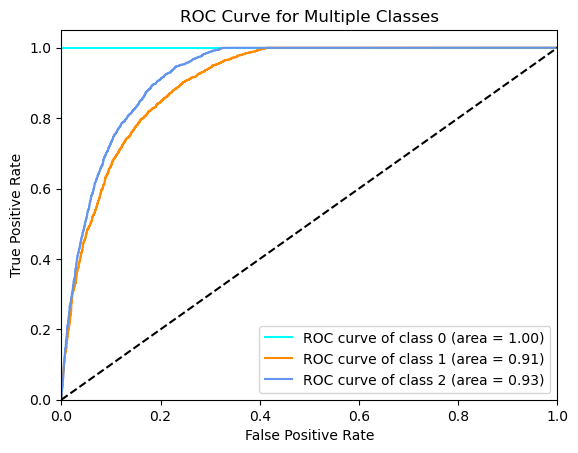

In [72]:
roc_auc_graphNB(model_nb,X_test,y_test)

## Prueba 1995-2019

### VSM

In [73]:
X_test3 = best_w3.drop(par, axis=1)
y_test = best_w3['QuasiToCont']

X_test_scaled3 = scaler.transform(X_test3)
X_test = pd.DataFrame(X_test_scaled3, columns=X_test.columns)

In [74]:
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.96%


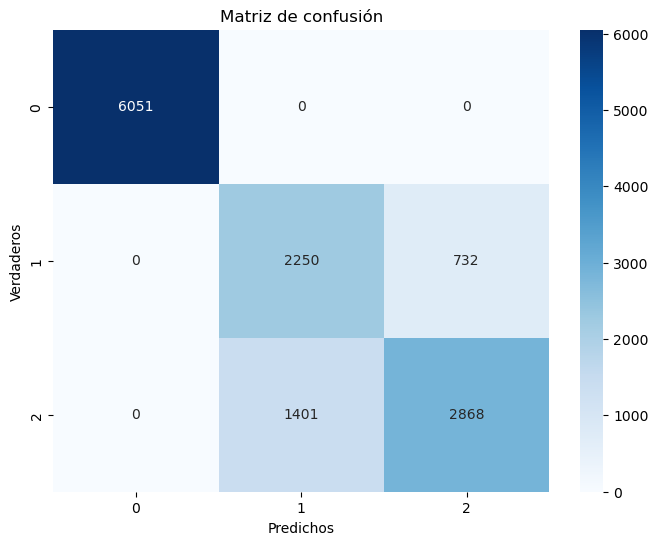

In [75]:

matrix(y_test, y_pred)


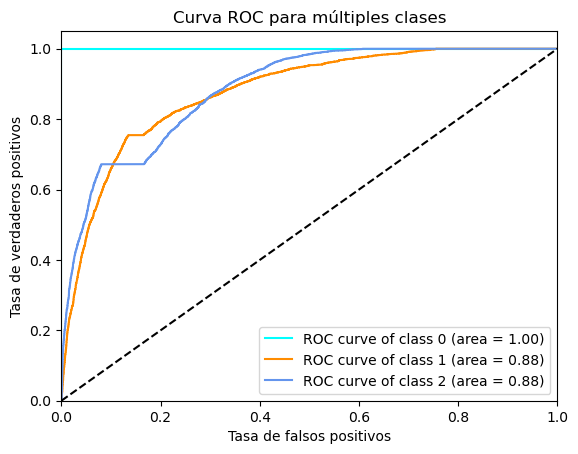

In [76]:
roc_auc_graph(model_svm,X_test,y_test)

In [77]:
check = pd.DataFrame()
check['y_test'] = y_test
check['y_pred'] = y_pred

check['next'] = check['y_test'].shift(-1)
check.dropna(subset=['next'], inplace=True)

check['day'] = 0

check.loc[(check['y_pred'] ==1) &(check['next']==1), 'day'] = 1
check.loc[(check['y_pred'] ==1) &(check['y_test']==1), 'day'] = 2
check.loc[(check['y_pred'] ==2) &(check['next']==2), 'day'] = 3
check.loc[(check['y_pred'] ==2) &(check['y_test']==2), 'day'] = 4


check


y_test  y_pred  next  day
19          0       0   2.0    0
20          2       2   0.0    4
21          0       0   2.0    0
22          2       2   0.0    4
23          0       0   0.0    0
...       ...     ...   ...  ...
18247       2       1   0.0    0
18248       0       0   1.0    0
18253       1       1   0.0    2
18254       0       0   2.0    0
18256       2       1   0.0    0

[13301 rows x 4 columns]

In [78]:
eff = check['day'].value_counts()
values = check['y_test'].value_counts()


In [79]:
print(f'Valores Quasi - Cont Predichos Correctamente: {eff[4] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Cont Predichos Correctamente con un día de diferencia: {eff[3] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente: {eff[2] / values[1] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: {eff[1] / values[1] * 100:.2f}%')




Valores Quasi - Cont Predichos Correctamente: 67.18%
Valores Quasi - Cont Predichos Correctamente con un día de diferencia: 7.73%
Valores Quasi - Quasi Predichos Correctamente: 75.45%
Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: 6.77%


### RandomForest

In [80]:
y_pred3 = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.67%


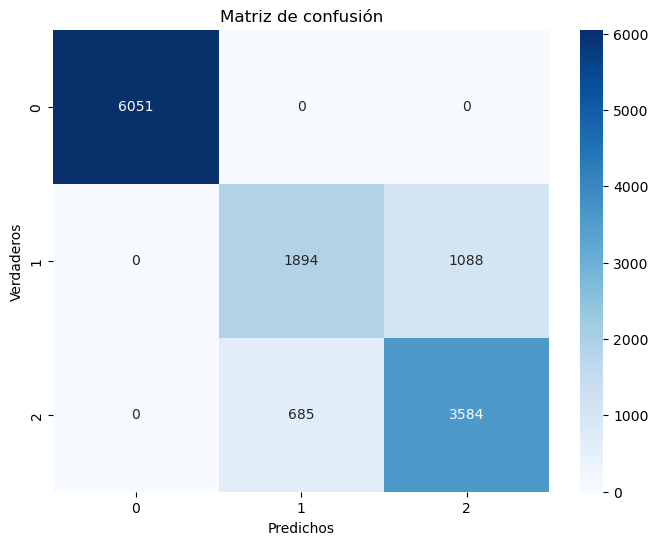

In [81]:

matrix(y_test, y_pred3)


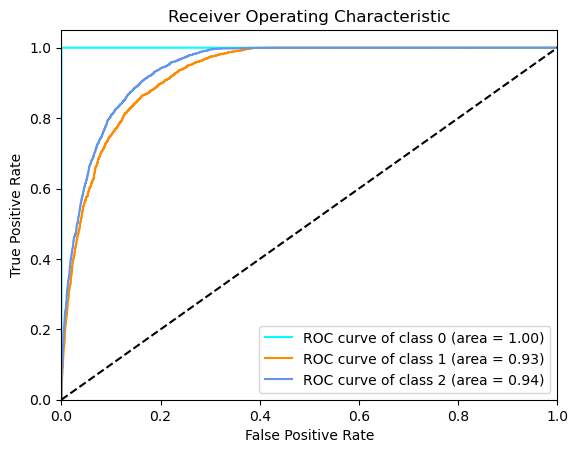

In [82]:
roc_auc_graphTree(model_rf,X_test,y_test)

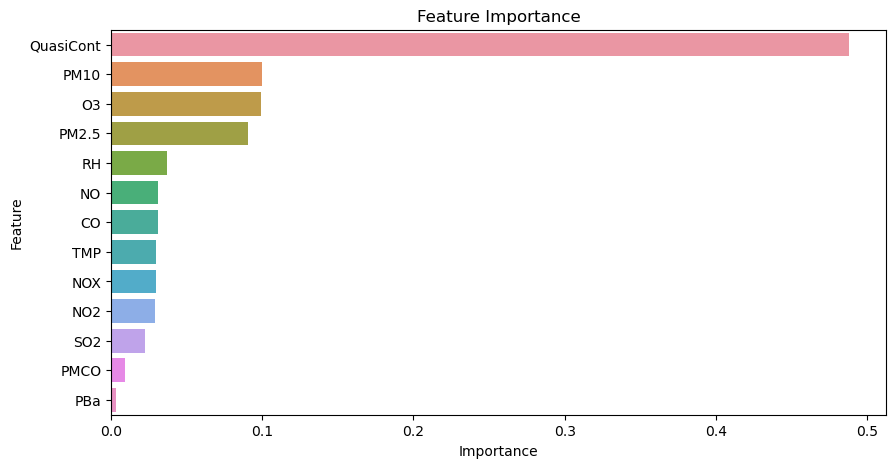

In [83]:
best_model = model_rf.best_estimator_

importances = pd.DataFrame({'feature': X_train.columns, 'importance': best_model.feature_importances_})

importances = importances.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 5))  
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [84]:
check = pd.DataFrame()
check['y_test'] = y_test
check['y_pred'] = y_pred

check['next'] = check['y_test'].shift(-1)
check.dropna(subset=['next'], inplace=True)

check['day'] = 0

check.loc[(check['y_pred'] ==1) &(check['next']==1), 'day'] = 1
check.loc[(check['y_pred'] ==1) &(check['y_test']==1), 'day'] = 2
check.loc[(check['y_pred'] ==2) &(check['next']==2), 'day'] = 3
check.loc[(check['y_pred'] ==2) &(check['y_test']==2), 'day'] = 4


check


y_test  y_pred  next  day
19          0       0   2.0    0
20          2       2   0.0    4
21          0       0   2.0    0
22          2       2   0.0    4
23          0       0   0.0    0
...       ...     ...   ...  ...
18247       2       1   0.0    0
18248       0       0   1.0    0
18253       1       1   0.0    2
18254       0       0   2.0    0
18256       2       1   0.0    0

[13301 rows x 4 columns]

In [85]:
eff = check['day'].value_counts()
values = check['y_test'].value_counts()

In [86]:
print(f'Valores Quasi - Cont Predichos Correctamente: {eff[4] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Cont Predichos Correctamente con un día de diferencia: {eff[3] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente: {eff[2] / values[1] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: {eff[1] / values[1] * 100:.2f}%')

Valores Quasi - Cont Predichos Correctamente: 67.18%
Valores Quasi - Cont Predichos Correctamente con un día de diferencia: 7.73%
Valores Quasi - Quasi Predichos Correctamente: 75.45%
Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: 6.77%


### Regresión Logística

In [87]:
y_pred = model_rl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.64%


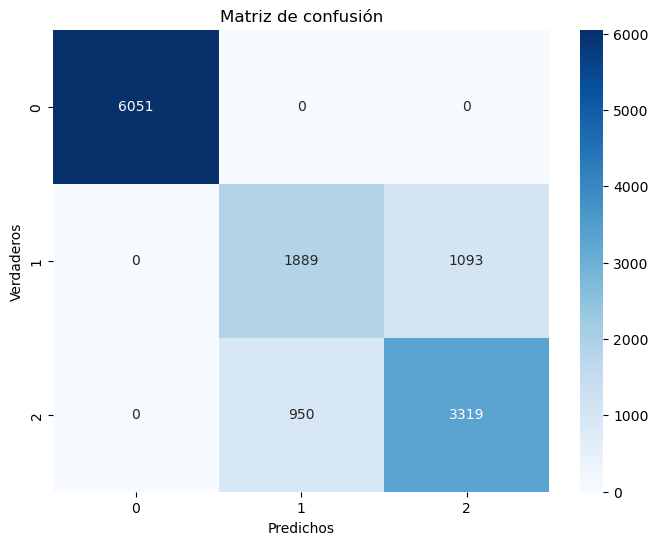

In [88]:
matrix(y_test, y_pred)


Text(0.5, 1.0, 'Histogram of Predicted Probabilities')

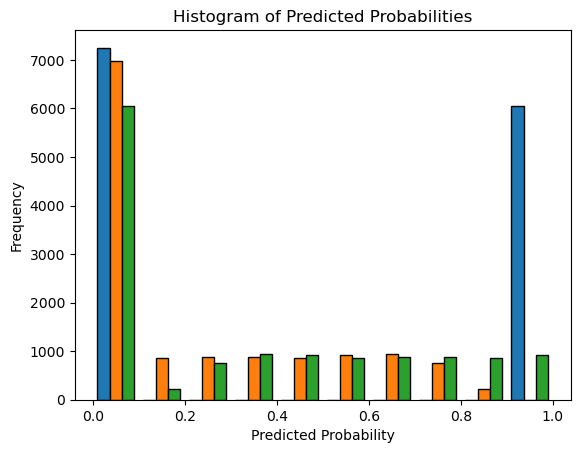

In [89]:
y_proba = model_rl.predict_proba(X_test)
plt.hist(y_proba, bins=10, edgecolor='k')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')

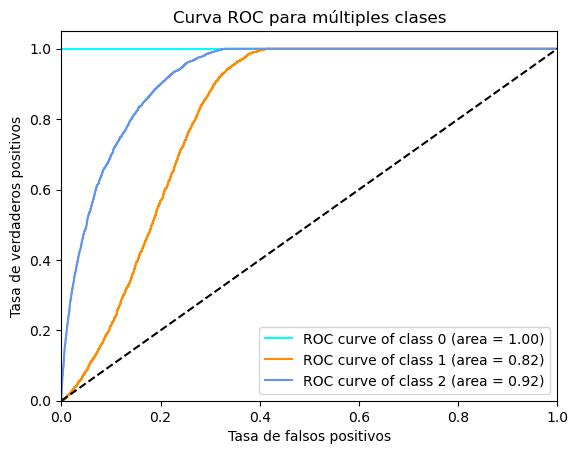

In [90]:
roc_auc_graph(model_rl,X_test,y_test)

In [91]:
check = pd.DataFrame()
check['y_test'] = y_test
check['y_pred'] = y_pred

check['next'] = check['y_test'].shift(-1)
check.dropna(subset=['next'], inplace=True)

check['day'] = 0

check.loc[(check['y_pred'] ==1) &(check['next']==1), 'day'] = 1
check.loc[(check['y_pred'] ==1) &(check['y_test']==1), 'day'] = 2
check.loc[(check['y_pred'] ==2) &(check['next']==2), 'day'] = 3
check.loc[(check['y_pred'] ==2) &(check['y_test']==2), 'day'] = 4


check

y_test  y_pred  next  day
19          0       0   2.0    0
20          2       2   0.0    4
21          0       0   2.0    0
22          2       2   0.0    4
23          0       0   0.0    0
...       ...     ...   ...  ...
18247       2       1   0.0    0
18248       0       0   1.0    0
18253       1       1   0.0    2
18254       0       0   2.0    0
18256       2       1   0.0    0

[13301 rows x 4 columns]

In [92]:
eff = check['day'].value_counts()
values = check['y_test'].value_counts()

In [93]:
print(f'Valores Quasi - Cont Predichos Correctamente: {eff[4] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Cont Predichos Correctamente con un día de diferencia: {eff[3] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente: {eff[2] / values[1] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: {eff[1] / values[1] * 100:.2f}%')

Valores Quasi - Cont Predichos Correctamente: 77.75%
Valores Quasi - Cont Predichos Correctamente con un día de diferencia: 10.61%
Valores Quasi - Quasi Predichos Correctamente: 63.35%
Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: 4.56%


### Naive Bayes

In [94]:
y_pred = model_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.67%


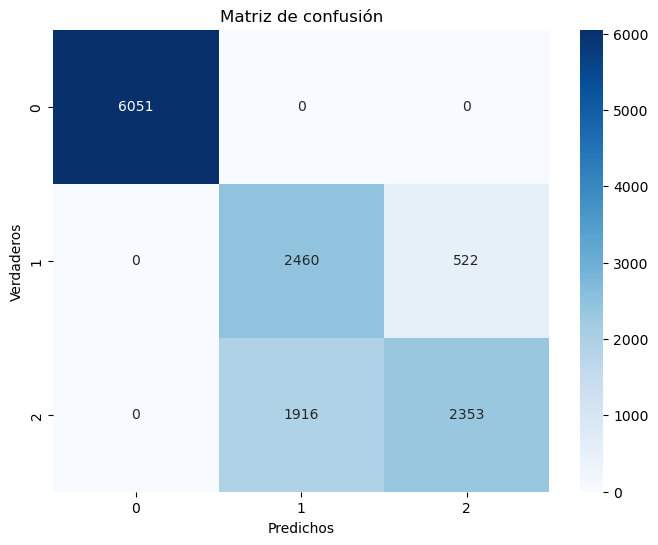

In [95]:
matrix(y_test, y_pred)

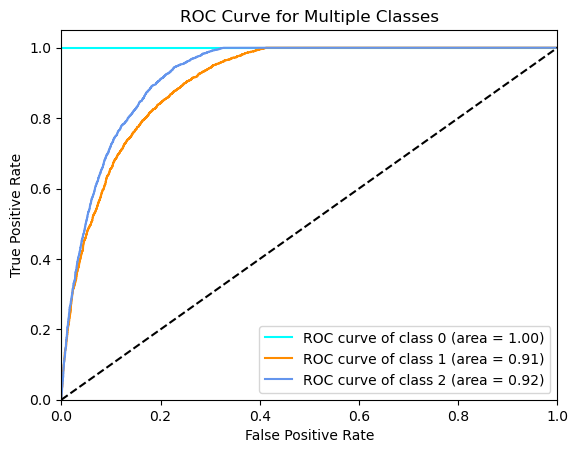

In [96]:
roc_auc_graphNB(model_nb,X_test,y_test)

In [97]:
check = pd.DataFrame()
check['y_test'] = y_test
check['y_pred'] = y_pred

check['next'] = check['y_test'].shift(-1)
check.dropna(subset=['next'], inplace=True)

check['day'] = 0

check.loc[(check['y_pred'] ==1) &(check['next']==1), 'day'] = 1
check.loc[(check['y_pred'] ==1) &(check['y_test']==1), 'day'] = 2
check.loc[(check['y_pred'] ==2) &(check['next']==2), 'day'] = 3
check.loc[(check['y_pred'] ==2) &(check['y_test']==2), 'day'] = 4


check

y_test  y_pred  next  day
19          0       0   2.0    0
20          2       2   0.0    4
21          0       0   2.0    0
22          2       2   0.0    4
23          0       0   0.0    0
...       ...     ...   ...  ...
18247       2       1   0.0    0
18248       0       0   1.0    0
18253       1       1   0.0    2
18254       0       0   2.0    0
18256       2       1   0.0    0

[13301 rows x 4 columns]

In [98]:
eff = check['day'].value_counts()
values = check['y_test'].value_counts()

In [99]:
print(f'Valores Quasi - Cont Predichos Correctamente: {eff[4] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Cont Predichos Correctamente con un día de diferencia: {eff[3] / values[2] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente: {eff[2] / values[1] * 100:.2f}%')
print(f'Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: {eff[1] / values[1] * 100:.2f}%')

Valores Quasi - Cont Predichos Correctamente: 55.12%
Valores Quasi - Cont Predichos Correctamente con un día de diferencia: 5.60%
Valores Quasi - Quasi Predichos Correctamente: 82.49%
Valores Quasi - Quasi Predichos Correctamente con un día de diferencia: 8.89%
